In [1]:
import json
import csv
import pandas as pd
import numpy as np 

from igraph import *
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from scipy.spatial import distance

from scipy.spatial import Delaunay

In [2]:
uber_filename = '/uber_dec.txt'
DIR_PATH ="graph_data/"
UBER_DIR_PATH = "uber_data/"

In [3]:
graph = Graph.Read_Ncol(UBER_DIR_PATH + uber_filename,  directed = False)

In [4]:
# graph.get_edgelist() #NOT INCLUDE WEIGHTS OF EDGE

In [5]:
#manually creating edge list to include the weights.

edge_arr= []
for e in graph.es:
    edge = (e.source, e.target , e['weight'])
#     print(edge)
    edge_arr.append(edge)
    

In [6]:
# adj = graph.get_adjacency(attribute='weight', eids=False).data

In [7]:
# adj_dist = np.where(np.matrix(adj)==0.0, np.inf, np.matrix(adj)).tolist()

In [5]:
csv_filename="uber_data/distance_matrix.csv"

In [24]:
dist_m_file = pd.read_csv(csv_filename ,sep=',')
dist_m_ids= dist_m_file['Unnamed: 0']
dist_matrix_df = dist_m_file.drop(['Unnamed: 0'], axis=1)
dist_matrix_final = dist_matrix_df.values

In [25]:
# dist_m_ids


0        758
1        972
2       1197
3       2006
4        620
        ... 
2644    2712
2645    2114
2646    2473
2647    2144
2648    2471
Name: Unnamed: 0, Length: 2649, dtype: int64

In [ ]:
# type(np.matrix(dist_matrix))

# Applying tspy
    
    https://github.com/wborgeaud/tspy
    NxN distance matrix D

In [12]:
!pip3 install tspy

In [13]:
from tspy import TSP
tsp = TSP()

In [14]:
tsp.read_mat(np.matrix(dist_matrix_final))

In [15]:
%%time
from tspy.solvers import TwoOpt_solver
two_opt = TwoOpt_solver(initial_tour='NN', iter_num=500)
two_opt_tour = tsp.get_approx_solution(two_opt)

The cost is 313120.5699999996.
CPU times: user 3h 57min 47s, sys: 11.5 s, total: 3h 57min 58s
Wall time: 3h 58min 2s


In [16]:
%%time
best_tour_tspy = tsp.get_best_solution()

The best solution is given by TwoOpt_solver with score 313120.5699999996
CPU times: user 3.31 ms, sys: 66 µs, total: 3.37 ms
Wall time: 3.33 ms


In [31]:
best_tour_tspy[:4]

[253, 2217, 1680, 753]

In [26]:
locations_df = pd.read_csv("uber_data/"+"locations.csv")
locations_df.head()


,MOVEMENT_ID,mean_coordinate
0,1,[-118.12053321 34.10309557]
1,2,[-118.13785063 34.09645121]
2,3,[-118.13138209 34.09626386]
3,4,[-118.13224544 34.10349303]
4,5,[-118.14492317 34.0986815 ]


In [69]:
def find_tour_coordinates(tour, loc_df):
    coor_arr=[]
    
    for v_id in tour:
        # v_id = 2217
        v_name = graph.vs[v_id]['name']
        mean_coor = loc_df.iloc[int(v_name)-1].mean_coordinate

        nums = [float(n) for n in mean_coor[1:-1].split()]

        coor_arr.append(np.array(nums))
        
    return np.array(coor_arr)

In [79]:
def plot_coordinates(coor_arr, title):
    plt.figure(figsize=(15,10))
    plt.plot(coor_arr[:,0],coor_arr[:,1])
    plt.title(title)
    plt.show()

In [30]:
len(best_tour_tspy), min(best_tour_tspy), max(best_tour_tspy)

(2650, 0, 2648)

# Plot Graph

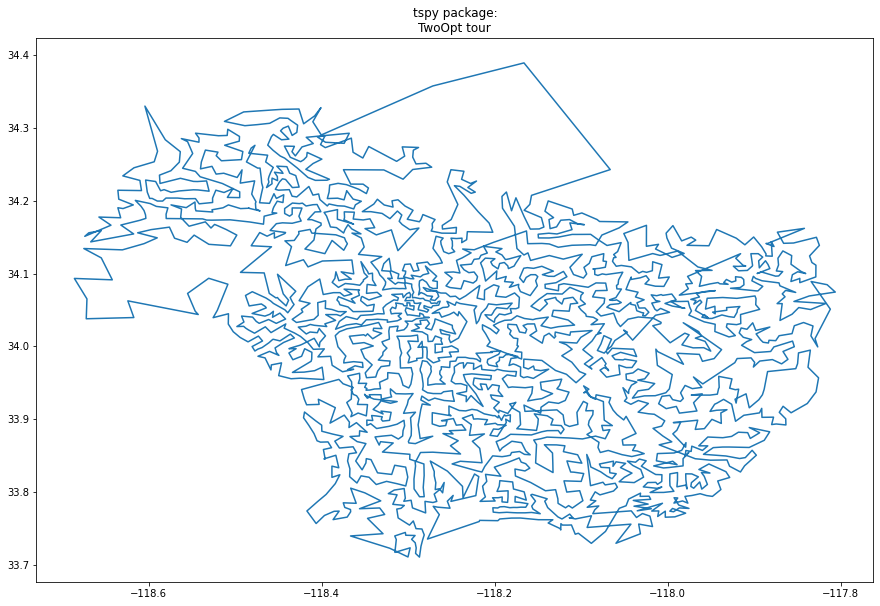

In [86]:
tspy_coor= find_tour_coordinates(best_tour_tspy, locations_df)
title= "tspy package:\nTwoOpt tour"
plot_coordinates(tspy_coor,title)


# Applying satsp
    https://github.com/hcluo/satsp
    Using Simulated Annealing


In [16]:
!pip3 install satsp

In [18]:
from satsp import solver

In [19]:
%%time
solver.Solve(dist_matrix = dist_matrix_final, epochs = 10000)

Simulated Annealing starts with parameters:
Initial Temperature:  6655.044394126641
Cooling Rate:  0.99
Initial Epoch Length:  100
Stopping Criterion: After 10000 epochs

Epoch  1
Temperature:  6655.044394126641
Epoch Length:  100
Current Dist:  4124404.3699999964
Best Dist:  4097163.199999997
Epoch  2
Temperature:  6588.493950185375
Epoch Length:  100
Current Dist:  4181331.0599999935
Best Dist:  4097163.199999997
Epoch  3
Temperature:  6522.609010683521
Epoch Length:  100
Current Dist:  4229186.289999991
Best Dist:  4097163.199999997
Epoch  4
Temperature:  6457.382920576686
Epoch Length:  100
Current Dist:  4280314.99999999
Best Dist:  4097163.199999997
Epoch  5
Temperature:  6392.809091370919
Epoch Length:  100
Current Dist:  4318173.309999989
Best Dist:  4097163.199999997
Epoch  6
Temperature:  6328.88100045721
Epoch Length:  100
Current Dist:  4344040.93999999
Best Dist:  4097163.199999997
Epoch  7
Temperature:  6265.592190452638
Epoch Length:  100
Current Dist:  4391750.539999991

Epoch  66
Temperature:  3462.8892783008478
Epoch Length:  100
Current Dist:  4835679.520000008
Best Dist:  4097163.199999997
Epoch  67
Temperature:  3428.260385517839
Epoch Length:  100
Current Dist:  4808958.350000006
Best Dist:  4097163.199999997
Epoch  68
Temperature:  3393.9777816626606
Epoch Length:  100
Current Dist:  4814006.740000008
Best Dist:  4097163.199999997
Epoch  69
Temperature:  3360.038003846034
Epoch Length:  100
Current Dist:  4803280.900000003
Best Dist:  4097163.199999997
Epoch  70
Temperature:  3326.4376238075733
Epoch Length:  100
Current Dist:  4812505.040000004
Best Dist:  4097163.199999997
Epoch  71
Temperature:  3293.1732475694976
Epoch Length:  100
Current Dist:  4803581.530000002
Best Dist:  4097163.199999997
Epoch  72
Temperature:  3260.2415150938027
Epoch Length:  100
Current Dist:  4798895.920000003
Best Dist:  4097163.199999997
Epoch  73
Temperature:  3227.6390999428645
Epoch Length:  100
Current Dist:  4791682.119999997
Best Dist:  4097163.199999997
Ep

Epoch  132
Temperature:  1783.8628007816924
Epoch Length:  100
Current Dist:  4671040.120000012
Best Dist:  4097163.199999997
Epoch  133
Temperature:  1766.0241727738755
Epoch Length:  100
Current Dist:  4657432.970000012
Best Dist:  4097163.199999997
Epoch  134
Temperature:  1748.3639310461367
Epoch Length:  100
Current Dist:  4648746.390000017
Best Dist:  4097163.199999997
Epoch  135
Temperature:  1730.8802917356754
Epoch Length:  100
Current Dist:  4643460.500000019
Best Dist:  4097163.199999997
Epoch  136
Temperature:  1713.5714888183186
Epoch Length:  100
Current Dist:  4639467.140000018
Best Dist:  4097163.199999997
Epoch  137
Temperature:  1696.4357739301354
Epoch Length:  100
Current Dist:  4621714.650000021
Best Dist:  4097163.199999997
Epoch  138
Temperature:  1679.471416190834
Epoch Length:  100
Current Dist:  4618222.680000023
Best Dist:  4097163.199999997
Epoch  139
Temperature:  1662.6767020289255
Epoch Length:  100
Current Dist:  4612521.400000025
Best Dist:  4097163.199

Epoch  198
Temperature:  918.9339410742339
Epoch Length:  100
Current Dist:  4123538.5500000375
Best Dist:  4097163.199999997
Epoch  199
Temperature:  909.7446016634915
Epoch Length:  100
Current Dist:  4122347.290000037
Best Dist:  4097163.199999997
Epoch  200
Temperature:  900.6471556468566
Epoch Length:  100
Current Dist:  4121535.480000036
Best Dist:  4097163.199999997
Epoch  201
Temperature:  891.640684090388
Epoch Length:  100
Current Dist:  4111318.7500000354
Best Dist:  4097163.199999997
Epoch  202
Temperature:  882.7242772494842
Epoch Length:  100
Current Dist:  4101170.9100000355
Best Dist:  4097163.199999997
Epoch  203
Temperature:  873.8970344769893
Epoch Length:  100
Current Dist:  4092627.630000034
Best Dist:  4091550.2400000347
Epoch  204
Temperature:  865.1580641322195
Epoch Length:  100
Current Dist:  4074670.2300000326
Best Dist:  4074479.9300000328
Epoch  205
Temperature:  856.5064834908973
Epoch Length:  100
Current Dist:  4064131.5500000324
Best Dist:  4064131.5500

Epoch  264
Temperature:  473.3769815078761
Epoch Length:  100
Current Dist:  3606717.2600000333
Best Dist:  3603181.330000032
Epoch  265
Temperature:  468.64321169279737
Epoch Length:  100
Current Dist:  3599745.7300000335
Best Dist:  3598687.870000034
Epoch  266
Temperature:  463.9567795758694
Epoch Length:  100
Current Dist:  3597954.080000032
Best Dist:  3595932.7400000333
Epoch  267
Temperature:  459.3172117801107
Epoch Length:  100
Current Dist:  3588957.8100000327
Best Dist:  3588957.8100000327
Epoch  268
Temperature:  454.7240396623096
Epoch Length:  100
Current Dist:  3579055.2900000317
Best Dist:  3578900.870000032
Epoch  269
Temperature:  450.1767992656865
Epoch Length:  100
Current Dist:  3566129.0200000317
Best Dist:  3566129.0200000317
Epoch  270
Temperature:  445.6750312730296
Epoch Length:  100
Current Dist:  3566375.3400000324
Best Dist:  3565337.610000032
Epoch  271
Temperature:  441.2182809602993
Epoch Length:  100
Current Dist:  3558447.430000033
Best Dist:  3557188.

Epoch  329
Temperature:  246.31722596843267
Epoch Length:  100
Current Dist:  3153145.9400000325
Best Dist:  3153044.6500000325
Epoch  330
Temperature:  243.85405370874832
Epoch Length:  100
Current Dist:  3148572.8600000325
Best Dist:  3148280.970000033
Epoch  331
Temperature:  241.41551317166085
Epoch Length:  100
Current Dist:  3139711.4900000324
Best Dist:  3139711.4900000324
Epoch  332
Temperature:  239.00135803994425
Epoch Length:  100
Current Dist:  3133330.3000000324
Best Dist:  3132310.290000032
Epoch  333
Temperature:  236.6113444595448
Epoch Length:  100
Current Dist:  3124604.5800000327
Best Dist:  3124604.5800000327
Epoch  334
Temperature:  234.24523101494935
Epoch Length:  100
Current Dist:  3117533.8100000327
Best Dist:  3117533.8100000327
Epoch  335
Temperature:  231.90277870479986
Epoch Length:  100
Current Dist:  3116365.3500000327
Best Dist:  3115978.260000033
Epoch  336
Temperature:  229.58375091775184
Epoch Length:  100
Current Dist:  3107726.190000034
Best Dist:  

Epoch  394
Temperature:  128.1688340981879
Epoch Length:  100
Current Dist:  2779348.260000029
Best Dist:  2779348.260000029
Epoch  395
Temperature:  126.887145757206
Epoch Length:  100
Current Dist:  2773584.8600000297
Best Dist:  2773584.8600000297
Epoch  396
Temperature:  125.61827429963394
Epoch Length:  100
Current Dist:  2768037.3900000295
Best Dist:  2767996.1200000294
Epoch  397
Temperature:  124.3620915566376
Epoch Length:  100
Current Dist:  2763640.8300000294
Best Dist:  2763640.8300000294
Epoch  398
Temperature:  123.11847064107121
Epoch Length:  100
Current Dist:  2761182.630000029
Best Dist:  2761182.630000029
Epoch  399
Temperature:  121.8872859346605
Epoch Length:  100
Current Dist:  2753125.28000003
Best Dist:  2753125.28000003
Epoch  400
Temperature:  120.6684130753139
Epoch Length:  100
Current Dist:  2750039.2900000303
Best Dist:  2750039.2900000303
Epoch  401
Temperature:  119.46172894456075
Epoch Length:  100
Current Dist:  2747988.02000003
Best Dist:  2747988.020

Epoch  461
Temperature:  65.36427850350107
Epoch Length:  100
Current Dist:  2508095.2400000356
Best Dist:  2508095.2400000356
Epoch  462
Temperature:  64.71063571846605
Epoch Length:  100
Current Dist:  2503310.9600000354
Best Dist:  2503294.1600000355
Epoch  463
Temperature:  64.0635293612814
Epoch Length:  100
Current Dist:  2498981.0800000345
Best Dist:  2498981.0800000345
Epoch  464
Temperature:  63.42289406766858
Epoch Length:  100
Current Dist:  2497992.510000035
Best Dist:  2497987.3800000353
Epoch  465
Temperature:  62.788665126991894
Epoch Length:  100
Current Dist:  2493632.5800000355
Best Dist:  2493632.5800000355
Epoch  466
Temperature:  62.160778475721976
Epoch Length:  100
Current Dist:  2487998.990000036
Best Dist:  2487998.990000036
Epoch  467
Temperature:  61.53917069096475
Epoch Length:  100
Current Dist:  2481262.810000036
Best Dist:  2481262.810000036
Epoch  468
Temperature:  60.923778984055105
Epoch Length:  100
Current Dist:  2480290.2800000357
Best Dist:  248024

Epoch  526
Temperature:  34.011682839171904
Epoch Length:  100
Current Dist:  2315764.290000038
Best Dist:  2315764.290000038
Epoch  527
Temperature:  33.67156601078018
Epoch Length:  100
Current Dist:  2313293.6700000386
Best Dist:  2313293.6700000386
Epoch  528
Temperature:  33.33485035067238
Epoch Length:  100
Current Dist:  2309886.4500000393
Best Dist:  2309886.4500000393
Epoch  529
Temperature:  33.001501847165656
Epoch Length:  100
Current Dist:  2308658.8900000397
Best Dist:  2308658.8900000397
Epoch  530
Temperature:  32.671486828694
Epoch Length:  100
Current Dist:  2304529.9800000396
Best Dist:  2304505.4400000395
Epoch  531
Temperature:  32.34477196040706
Epoch Length:  100
Current Dist:  2303069.4000000395
Best Dist:  2303069.4000000395
Epoch  532
Temperature:  32.02132424080299
Epoch Length:  100
Current Dist:  2298915.3200000394
Best Dist:  2298915.3200000394
Epoch  533
Temperature:  31.70111099839496
Epoch Length:  100
Current Dist:  2297674.4000000395
Best Dist:  22976

Epoch  593
Temperature:  17.345473453938624
Epoch Length:  100
Current Dist:  2161609.3700000406
Best Dist:  2161609.3700000406
Epoch  594
Temperature:  17.172018719399237
Epoch Length:  100
Current Dist:  2160544.3900000406
Best Dist:  2160544.3900000406
Epoch  595
Temperature:  17.000298532205242
Epoch Length:  100
Current Dist:  2158410.9800000414
Best Dist:  2158353.740000041
Epoch  596
Temperature:  16.83029554688319
Epoch Length:  100
Current Dist:  2155519.6200000416
Best Dist:  2155519.6200000416
Epoch  597
Temperature:  16.661992591414357
Epoch Length:  100
Current Dist:  2151690.6400000416
Best Dist:  2151690.6400000416
Epoch  598
Temperature:  16.495372665500213
Epoch Length:  100
Current Dist:  2147469.6000000415
Best Dist:  2147469.6000000415
Epoch  599
Temperature:  16.33041893884521
Epoch Length:  100
Current Dist:  2145468.0000000414
Best Dist:  2145468.0000000414
Epoch  600
Temperature:  16.167114749456758
Epoch Length:  100
Current Dist:  2144760.3800000413
Best Dist:

Epoch  660
Temperature:  8.845944223458913
Epoch Length:  100
Current Dist:  2029547.6300000423
Best Dist:  2029547.6300000423
Epoch  661
Temperature:  8.757484781224324
Epoch Length:  100
Current Dist:  2028618.0400000424
Best Dist:  2028618.0400000424
Epoch  662
Temperature:  8.66990993341208
Epoch Length:  100
Current Dist:  2027220.5100000424
Best Dist:  2027220.5100000424
Epoch  663
Temperature:  8.58321083407796
Epoch Length:  100
Current Dist:  2025533.7800000424
Best Dist:  2025533.7800000424
Epoch  664
Temperature:  8.49737872573718
Epoch Length:  100
Current Dist:  2024278.9600000426
Best Dist:  2024278.9600000426
Epoch  665
Temperature:  8.412404938479808
Epoch Length:  100
Current Dist:  2023500.7400000426
Best Dist:  2023500.7400000426
Epoch  666
Temperature:  8.32828088909501
Epoch Length:  100
Current Dist:  2020661.7500000424
Best Dist:  2020661.7500000424
Epoch  667
Temperature:  8.244998080204061
Epoch Length:  100
Current Dist:  2018789.5200000424
Best Dist:  2018789

Epoch  726
Temperature:  4.55687420816437
Epoch Length:  100
Current Dist:  1923767.2200000419
Best Dist:  1923767.2200000419
Epoch  727
Temperature:  4.511305466082726
Epoch Length:  100
Current Dist:  1922901.420000042
Best Dist:  1922901.420000042
Epoch  728
Temperature:  4.466192411421899
Epoch Length:  100
Current Dist:  1921953.4800000421
Best Dist:  1921953.4800000421
Epoch  729
Temperature:  4.421530487307679
Epoch Length:  100
Current Dist:  1921511.4100000423
Best Dist:  1921511.4100000423
Epoch  730
Temperature:  4.377315182434603
Epoch Length:  100
Current Dist:  1920216.3800000425
Best Dist:  1920216.3800000425
Epoch  731
Temperature:  4.333542030610257
Epoch Length:  100
Current Dist:  1918969.6700000425
Best Dist:  1918969.6700000425
Epoch  732
Temperature:  4.290206610304154
Epoch Length:  100
Current Dist:  1918353.5200000426
Best Dist:  1918353.5200000426
Epoch  733
Temperature:  4.247304544201112
Epoch Length:  100
Current Dist:  1918037.0200000426
Best Dist:  191803

Epoch  793
Temperature:  2.323940893616104
Epoch Length:  100
Current Dist:  1842510.2800000426
Best Dist:  1842510.2800000426
Epoch  794
Temperature:  2.300701484679943
Epoch Length:  100
Current Dist:  1841600.0000000426
Best Dist:  1841600.0000000426
Epoch  795
Temperature:  2.2776944698331434
Epoch Length:  100
Current Dist:  1841454.7500000426
Best Dist:  1841454.7500000426
Epoch  796
Temperature:  2.254917525134812
Epoch Length:  100
Current Dist:  1840986.2500000426
Best Dist:  1840986.2500000426
Epoch  797
Temperature:  2.2323683498834637
Epoch Length:  100
Current Dist:  1838048.9300000428
Best Dist:  1838048.9300000428
Epoch  798
Temperature:  2.210044666384629
Epoch Length:  100
Current Dist:  1837242.340000043
Best Dist:  1837242.340000043
Epoch  799
Temperature:  2.187944219720783
Epoch Length:  100
Current Dist:  1836824.4800000428
Best Dist:  1836824.4800000428
Epoch  800
Temperature:  2.166064777523575
Epoch Length:  100
Current Dist:  1836707.7400000428
Best Dist:  183

Epoch  859
Temperature:  1.1971482130006967
Epoch Length:  100
Current Dist:  1782448.9600000428
Best Dist:  1782448.9600000428
Epoch  860
Temperature:  1.1851767308706898
Epoch Length:  100
Current Dist:  1782009.570000043
Best Dist:  1782009.570000043
Epoch  861
Temperature:  1.173324963561983
Epoch Length:  100
Current Dist:  1780989.650000043
Best Dist:  1780989.650000043
Epoch  862
Temperature:  1.161591713926363
Epoch Length:  100
Current Dist:  1779214.3700000427
Best Dist:  1779214.3700000427
Epoch  863
Temperature:  1.1499757967870994
Epoch Length:  100
Current Dist:  1778411.6300000427
Best Dist:  1778411.6300000427
Epoch  864
Temperature:  1.1384760388192283
Epoch Length:  100
Current Dist:  1777933.6300000425
Best Dist:  1777933.6300000425
Epoch  865
Temperature:  1.127091278431036
Epoch Length:  100
Current Dist:  1777887.1100000425
Best Dist:  1777887.1100000425
Epoch  866
Temperature:  1.1158203656467256
Epoch Length:  100
Current Dist:  1777306.3600000425
Best Dist:  17

Epoch  925
Temperature:  0.6166954795742362
Epoch Length:  100
Current Dist:  1731216.0300000422
Best Dist:  1731216.0300000422
Epoch  926
Temperature:  0.6105285247784938
Epoch Length:  100
Current Dist:  1730133.570000042
Best Dist:  1730133.570000042
Epoch  927
Temperature:  0.6044232395307089
Epoch Length:  100
Current Dist:  1728231.1500000418
Best Dist:  1728231.1500000418
Epoch  928
Temperature:  0.5983790071354018
Epoch Length:  100
Current Dist:  1727740.3500000415
Best Dist:  1727740.3500000415
Epoch  929
Temperature:  0.5923952170640477
Epoch Length:  100
Current Dist:  1726569.4900000414
Best Dist:  1726569.4900000414
Epoch  930
Temperature:  0.5864712648934073
Epoch Length:  100
Current Dist:  1726569.4900000414
Best Dist:  1726569.4900000414
Epoch  931
Temperature:  0.5806065522444732
Epoch Length:  100
Current Dist:  1726222.8900000413
Best Dist:  1726222.8900000413
Epoch  932
Temperature:  0.5748004867220284
Epoch Length:  100
Current Dist:  1725132.9000000414
Best Dist

Epoch  992
Temperature:  0.3145059043594004
Epoch Length:  100
Current Dist:  1680828.0900000427
Best Dist:  1680828.0900000427
Epoch  993
Temperature:  0.3113608453158064
Epoch Length:  100
Current Dist:  1677559.2200000426
Best Dist:  1677559.2200000426
Epoch  994
Temperature:  0.3082472368626483
Epoch Length:  100
Current Dist:  1677559.2200000426
Best Dist:  1677559.2200000426
Epoch  995
Temperature:  0.30516476449402186
Epoch Length:  100
Current Dist:  1674670.0500000427
Best Dist:  1674670.0500000427
Epoch  996
Temperature:  0.30211311684908165
Epoch Length:  100
Current Dist:  1673886.1900000428
Best Dist:  1673886.1900000428
Epoch  997
Temperature:  0.2990919856805908
Epoch Length:  100
Current Dist:  1673812.5200000429
Best Dist:  1673812.5200000429
Epoch  998
Temperature:  0.2961010658237849
Epoch Length:  100
Current Dist:  1672769.060000043
Best Dist:  1672769.060000043
Epoch  999
Temperature:  0.2931400551655471
Epoch Length:  100
Current Dist:  1670048.4000000427
Best Di

Epoch  1059
Temperature:  0.16039352833462328
Epoch Length:  100
Current Dist:  1631539.9300000442
Best Dist:  1631539.9300000442
Epoch  1060
Temperature:  0.15878959305127704
Epoch Length:  100
Current Dist:  1630742.810000044
Best Dist:  1630742.810000044
Epoch  1061
Temperature:  0.15720169712076426
Epoch Length:  100
Current Dist:  1629104.8000000438
Best Dist:  1629104.8000000438
Epoch  1062
Temperature:  0.1556296801495566
Epoch Length:  100
Current Dist:  1628631.1000000439
Best Dist:  1628631.1000000439
Epoch  1063
Temperature:  0.15407338334806103
Epoch Length:  100
Current Dist:  1628463.620000044
Best Dist:  1628463.620000044
Epoch  1064
Temperature:  0.15253264951458043
Epoch Length:  100
Current Dist:  1627596.7900000438
Best Dist:  1627596.7900000438
Epoch  1065
Temperature:  0.15100732301943462
Epoch Length:  100
Current Dist:  1626883.2500000438
Best Dist:  1626883.2500000438
Epoch  1066
Temperature:  0.14949724978924028
Epoch Length:  100
Current Dist:  1625520.4900000

Epoch  1126
Temperature:  0.08179841324133365
Epoch Length:  100
Current Dist:  1585725.7200000451
Best Dist:  1585725.7200000451
Epoch  1127
Temperature:  0.08098042910892031
Epoch Length:  100
Current Dist:  1584636.380000045
Best Dist:  1584636.380000045
Epoch  1128
Temperature:  0.0801706248178311
Epoch Length:  100
Current Dist:  1583682.050000045
Best Dist:  1583682.050000045
Epoch  1129
Temperature:  0.0793689185696528
Epoch Length:  100
Current Dist:  1583562.960000045
Best Dist:  1583562.960000045
Epoch  1130
Temperature:  0.07857522938395627
Epoch Length:  100
Current Dist:  1583199.8800000448
Best Dist:  1583199.8800000448
Epoch  1131
Temperature:  0.0777894770901167
Epoch Length:  100
Current Dist:  1582374.5300000452
Best Dist:  1582374.5300000452
Epoch  1132
Temperature:  0.07701158231921554
Epoch Length:  100
Current Dist:  1581163.8100000452
Best Dist:  1581163.8100000452
Epoch  1133
Temperature:  0.07624146649602338
Epoch Length:  100
Current Dist:  1581163.8100000452


Epoch  1191
Temperature:  0.0425630290979613
Epoch Length:  100
Current Dist:  1543516.8600000455
Best Dist:  1543516.8600000455
Epoch  1192
Temperature:  0.04213739880698169
Epoch Length:  100
Current Dist:  1542829.4100000453
Best Dist:  1542829.4100000453
Epoch  1193
Temperature:  0.04171602481891187
Epoch Length:  100
Current Dist:  1542628.8400000453
Best Dist:  1542628.8400000453
Epoch  1194
Temperature:  0.04129886457072275
Epoch Length:  100
Current Dist:  1542241.9400000453
Best Dist:  1542241.9400000453
Epoch  1195
Temperature:  0.040885875925015525
Epoch Length:  100
Current Dist:  1540627.7500000454
Best Dist:  1540627.7500000454
Epoch  1196
Temperature:  0.04047701716576537
Epoch Length:  100
Current Dist:  1539886.1600000453
Best Dist:  1539886.1600000453
Epoch  1197
Temperature:  0.04007224699410772
Epoch Length:  100
Current Dist:  1539291.8600000453
Best Dist:  1539291.8600000453
Epoch  1198
Temperature:  0.03967152452416664
Epoch Length:  100
Current Dist:  1538329.25

Epoch  1256
Temperature:  0.022147268806413392
Epoch Length:  100
Current Dist:  1509390.9700000442
Best Dist:  1509390.9700000442
Epoch  1257
Temperature:  0.02192579611834926
Epoch Length:  100
Current Dist:  1508108.7700000443
Best Dist:  1508108.7700000443
Epoch  1258
Temperature:  0.021706538157165764
Epoch Length:  100
Current Dist:  1508108.7700000443
Best Dist:  1508108.7700000443
Epoch  1259
Temperature:  0.021489472775594105
Epoch Length:  100
Current Dist:  1507787.5500000443
Best Dist:  1507787.5500000443
Epoch  1260
Temperature:  0.021274578047838163
Epoch Length:  100
Current Dist:  1507047.2100000444
Best Dist:  1507047.2100000444
Epoch  1261
Temperature:  0.021061832267359783
Epoch Length:  100
Current Dist:  1506967.1100000446
Best Dist:  1506967.1100000446
Epoch  1262
Temperature:  0.020851213944686184
Epoch Length:  100
Current Dist:  1506453.6600000444
Best Dist:  1506453.6600000444
Epoch  1263
Temperature:  0.020642701805239323
Epoch Length:  100
Current Dist:  150

Epoch  1320
Temperature:  0.011640526692935332
Epoch Length:  100
Current Dist:  1479390.660000044
Best Dist:  1479390.660000044
Epoch  1321
Temperature:  0.011524121426005979
Epoch Length:  100
Current Dist:  1478754.3000000438
Best Dist:  1478754.3000000438
Epoch  1322
Temperature:  0.011408880211745919
Epoch Length:  100
Current Dist:  1478242.6100000439
Best Dist:  1478242.6100000439
Epoch  1323
Temperature:  0.01129479140962846
Epoch Length:  100
Current Dist:  1477460.0600000438
Best Dist:  1477460.0600000438
Epoch  1324
Temperature:  0.011181843495532175
Epoch Length:  100
Current Dist:  1477096.0000000438
Best Dist:  1477096.0000000438
Epoch  1325
Temperature:  0.011070025060576853
Epoch Length:  100
Current Dist:  1476403.630000044
Best Dist:  1476403.630000044
Epoch  1326
Temperature:  0.010959324809971084
Epoch Length:  100
Current Dist:  1475931.220000044
Best Dist:  1475931.220000044
Epoch  1327
Temperature:  0.010849731561871374
Epoch Length:  100
Current Dist:  1475297.0

Epoch  1387
Temperature:  0.00593650269223461
Epoch Length:  100
Current Dist:  1450098.2700000443
Best Dist:  1450098.2700000443
Epoch  1388
Temperature:  0.005877137665312264
Epoch Length:  100
Current Dist:  1449733.6600000442
Best Dist:  1449733.6600000442
Epoch  1389
Temperature:  0.005818366288659141
Epoch Length:  100
Current Dist:  1449655.550000044
Best Dist:  1449655.550000044
Epoch  1390
Temperature:  0.005760182625772549
Epoch Length:  100
Current Dist:  1449655.550000044
Best Dist:  1449655.550000044
Epoch  1391
Temperature:  0.005702580799514824
Epoch Length:  100
Current Dist:  1449615.4100000442
Best Dist:  1449615.4100000442
Epoch  1392
Temperature:  0.005645554991519675
Epoch Length:  100
Current Dist:  1449338.610000044
Best Dist:  1449338.610000044
Epoch  1393
Temperature:  0.005589099441604478
Epoch Length:  100
Current Dist:  1449242.740000044
Best Dist:  1449242.740000044
Epoch  1394
Temperature:  0.005533208447188433
Epoch Length:  100
Current Dist:  1448024.450

Epoch  1452
Temperature:  0.003089002913592308
Epoch Length:  100
Current Dist:  1423818.6200000427
Best Dist:  1423818.6200000427
Epoch  1453
Temperature:  0.003058112884456385
Epoch Length:  100
Current Dist:  1423703.7600000426
Best Dist:  1423703.7600000426
Epoch  1454
Temperature:  0.003027531755611821
Epoch Length:  100
Current Dist:  1422194.2000000426
Best Dist:  1422194.2000000426
Epoch  1455
Temperature:  0.0029972564380557026
Epoch Length:  100
Current Dist:  1421906.7500000426
Best Dist:  1421906.7500000426
Epoch  1456
Temperature:  0.0029672838736751455
Epoch Length:  100
Current Dist:  1421219.6700000425
Best Dist:  1421219.6700000425
Epoch  1457
Temperature:  0.002937611034938394
Epoch Length:  100
Current Dist:  1419973.0000000426
Best Dist:  1419973.0000000426
Epoch  1458
Temperature:  0.00290823492458901
Epoch Length:  100
Current Dist:  1419621.3200000427
Best Dist:  1419621.3200000427
Epoch  1459
Temperature:  0.0028791525753431198
Epoch Length:  100
Current Dist:  

Epoch  1522
Temperature:  0.0015285580612631505
Epoch Length:  100
Current Dist:  1396347.610000042
Best Dist:  1396347.610000042
Epoch  1523
Temperature:  0.001513272480650519
Epoch Length:  100
Current Dist:  1396347.610000042
Best Dist:  1396347.610000042
Epoch  1524
Temperature:  0.0014981397558440138
Epoch Length:  100
Current Dist:  1395767.890000042
Best Dist:  1395767.890000042
Epoch  1525
Temperature:  0.0014831583582855736
Epoch Length:  100
Current Dist:  1395767.890000042
Best Dist:  1395767.890000042
Epoch  1526
Temperature:  0.0014683267747027178
Epoch Length:  100
Current Dist:  1395689.720000042
Best Dist:  1395689.720000042
Epoch  1527
Temperature:  0.0014536435069556907
Epoch Length:  100
Current Dist:  1394493.420000042
Best Dist:  1394493.420000042
Epoch  1528
Temperature:  0.0014391070718861338
Epoch Length:  100
Current Dist:  1394271.0400000422
Best Dist:  1394271.0400000422
Epoch  1529
Temperature:  0.0014247160011672724
Epoch Length:  100
Current Dist:  1393902

Epoch  1586
Temperature:  0.0008034047479787949
Epoch Length:  100
Current Dist:  1371880.140000042
Best Dist:  1371880.140000042
Epoch  1587
Temperature:  0.0007953707004990069
Epoch Length:  100
Current Dist:  1371024.7000000423
Best Dist:  1371024.7000000423
Epoch  1588
Temperature:  0.0007874169934940169
Epoch Length:  100
Current Dist:  1370266.0000000424
Best Dist:  1370266.0000000424
Epoch  1589
Temperature:  0.0007795428235590767
Epoch Length:  100
Current Dist:  1370071.8600000425
Best Dist:  1370071.8600000425
Epoch  1590
Temperature:  0.0007717473953234859
Epoch Length:  100
Current Dist:  1370071.8600000425
Best Dist:  1370071.8600000425
Epoch  1591
Temperature:  0.000764029921370251
Epoch Length:  100
Current Dist:  1370005.9100000423
Best Dist:  1370005.9100000423
Epoch  1592
Temperature:  0.0007563896221565485
Epoch Length:  100
Current Dist:  1370005.9100000423
Best Dist:  1370005.9100000423
Epoch  1593
Temperature:  0.000748825725934983
Epoch Length:  100
Current Dist:

Epoch  1649
Temperature:  0.000426532033938398
Epoch Length:  100
Current Dist:  1354798.8800000416
Best Dist:  1354798.8800000416
Epoch  1650
Temperature:  0.00042226671359901405
Epoch Length:  100
Current Dist:  1354292.7600000417
Best Dist:  1354292.7600000417
Epoch  1651
Temperature:  0.0004180440464630239
Epoch Length:  100
Current Dist:  1353894.4900000417
Best Dist:  1353894.4900000417
Epoch  1652
Temperature:  0.00041386360599839366
Epoch Length:  100
Current Dist:  1353845.7800000417
Best Dist:  1353845.7800000417
Epoch  1653
Temperature:  0.00040972496993840974
Epoch Length:  100
Current Dist:  1353828.0200000417
Best Dist:  1353828.0200000417
Epoch  1654
Temperature:  0.00040562772023902563
Epoch Length:  100
Current Dist:  1353708.8500000418
Best Dist:  1353708.8500000418
Epoch  1655
Temperature:  0.00040157144303663535
Epoch Length:  100
Current Dist:  1353584.4000000418
Best Dist:  1353584.4000000418
Epoch  1656
Temperature:  0.00039755572860626897
Epoch Length:  100
Curr

Epoch  1714
Temperature:  0.00022194190146660424
Epoch Length:  100
Current Dist:  1335701.1500000418
Best Dist:  1335701.1500000418
Epoch  1715
Temperature:  0.0002197224824519382
Epoch Length:  100
Current Dist:  1335701.1500000418
Best Dist:  1335701.1500000418
Epoch  1716
Temperature:  0.00021752525762741882
Epoch Length:  100
Current Dist:  1335462.4300000418
Best Dist:  1335462.4300000418
Epoch  1717
Temperature:  0.00021535000505114462
Epoch Length:  100
Current Dist:  1335462.4300000418
Best Dist:  1335462.4300000418
Epoch  1718
Temperature:  0.00021319650500063316
Epoch Length:  100
Current Dist:  1335424.550000042
Best Dist:  1335424.550000042
Epoch  1719
Temperature:  0.00021106453995062684
Epoch Length:  100
Current Dist:  1334761.850000042
Best Dist:  1334761.850000042
Epoch  1720
Temperature:  0.00020895389455112057
Epoch Length:  100
Current Dist:  1334525.820000042
Best Dist:  1334525.820000042
Epoch  1721
Temperature:  0.00020686435560560937
Epoch Length:  100
Current 

Epoch  1776
Temperature:  0.00011902038959860382
Epoch Length:  100
Current Dist:  1313214.7800000412
Best Dist:  1313214.7800000412
Epoch  1777
Temperature:  0.00011783018570261778
Epoch Length:  100
Current Dist:  1313091.6500000414
Best Dist:  1313091.6500000414
Epoch  1778
Temperature:  0.00011665188384559161
Epoch Length:  100
Current Dist:  1312729.0900000413
Best Dist:  1312729.0900000413
Epoch  1779
Temperature:  0.00011548536500713569
Epoch Length:  100
Current Dist:  1312463.7300000412
Best Dist:  1312463.7300000412
Epoch  1780
Temperature:  0.00011433051135706433
Epoch Length:  100
Current Dist:  1312463.7300000412
Best Dist:  1312463.7300000412
Epoch  1781
Temperature:  0.00011318720624349369
Epoch Length:  100
Current Dist:  1310958.6600000411
Best Dist:  1310958.6600000411
Epoch  1782
Temperature:  0.00011205533418105876
Epoch Length:  100
Current Dist:  1310518.610000041
Best Dist:  1310518.610000041
Epoch  1783
Temperature:  0.00011093478083924816
Epoch Length:  100
Cur

Epoch  1839
Temperature:  6.318858456257591e-05
Epoch Length:  100
Current Dist:  1291001.260000041
Best Dist:  1291001.260000041
Epoch  1840
Temperature:  6.255669871695015e-05
Epoch Length:  100
Current Dist:  1290654.450000041
Best Dist:  1290654.450000041
Epoch  1841
Temperature:  6.193113172978065e-05
Epoch Length:  100
Current Dist:  1290631.3300000408
Best Dist:  1290631.3300000408
Epoch  1842
Temperature:  6.131182041248285e-05
Epoch Length:  100
Current Dist:  1290628.690000041
Best Dist:  1290628.690000041
Epoch  1843
Temperature:  6.069870220835802e-05
Epoch Length:  100
Current Dist:  1289335.060000041
Best Dist:  1289335.060000041
Epoch  1844
Temperature:  6.009171518627444e-05
Epoch Length:  100
Current Dist:  1287749.270000041
Best Dist:  1287749.270000041
Epoch  1845
Temperature:  5.9490798034411694e-05
Epoch Length:  100
Current Dist:  1287749.270000041
Best Dist:  1287749.270000041
Epoch  1846
Temperature:  5.8895890054067576e-05
Epoch Length:  100
Current Dist:  1287

Epoch  1906
Temperature:  3.222527745259904e-05
Epoch Length:  100
Current Dist:  1273337.590000041
Best Dist:  1273337.590000041
Epoch  1907
Temperature:  3.190302467807305e-05
Epoch Length:  100
Current Dist:  1273221.360000041
Best Dist:  1273221.360000041
Epoch  1908
Temperature:  3.158399443129232e-05
Epoch Length:  100
Current Dist:  1273221.360000041
Best Dist:  1273221.360000041
Epoch  1909
Temperature:  3.12681544869794e-05
Epoch Length:  100
Current Dist:  1272686.510000041
Best Dist:  1272686.510000041
Epoch  1910
Temperature:  3.0955472942109606e-05
Epoch Length:  100
Current Dist:  1272686.510000041
Best Dist:  1272686.510000041
Epoch  1911
Temperature:  3.064591821268851e-05
Epoch Length:  100
Current Dist:  1272307.1100000408
Best Dist:  1272307.1100000408
Epoch  1912
Temperature:  3.0339459030561624e-05
Epoch Length:  100
Current Dist:  1271856.1300000409
Best Dist:  1271856.1300000409
Epoch  1913
Temperature:  3.0036064440256006e-05
Epoch Length:  100
Current Dist:  12

Epoch  1972
Temperature:  1.660043653511416e-05
Epoch Length:  100
Current Dist:  1256656.1700000411
Best Dist:  1256656.1700000411
Epoch  1973
Temperature:  1.6434432169763018e-05
Epoch Length:  100
Current Dist:  1256656.1700000411
Best Dist:  1256656.1700000411
Epoch  1974
Temperature:  1.627008784806539e-05
Epoch Length:  100
Current Dist:  1256656.1700000411
Best Dist:  1256656.1700000411
Epoch  1975
Temperature:  1.6107386969584736e-05
Epoch Length:  100
Current Dist:  1255752.5700000413
Best Dist:  1255752.5700000413
Epoch  1976
Temperature:  1.594631309988889e-05
Epoch Length:  100
Current Dist:  1254756.7700000412
Best Dist:  1254756.7700000412
Epoch  1977
Temperature:  1.578684996889e-05
Epoch Length:  100
Current Dist:  1254699.3400000413
Best Dist:  1254699.3400000413
Epoch  1978
Temperature:  1.56289814692011e-05
Epoch Length:  100
Current Dist:  1254657.7600000412
Best Dist:  1254657.7600000412
Epoch  1979
Temperature:  1.547269165450909e-05
Epoch Length:  100
Current Dis

Epoch  2034
Temperature:  8.902286638350188e-06
Epoch Length:  100
Current Dist:  1242347.8700000416
Best Dist:  1242347.8700000416
Epoch  2035
Temperature:  8.813263771966686e-06
Epoch Length:  100
Current Dist:  1242347.8700000416
Best Dist:  1242347.8700000416
Epoch  2036
Temperature:  8.72513113424702e-06
Epoch Length:  100
Current Dist:  1242347.8700000416
Best Dist:  1242347.8700000416
Epoch  2037
Temperature:  8.63787982290455e-06
Epoch Length:  100
Current Dist:  1242016.5200000415
Best Dist:  1242016.5200000415
Epoch  2038
Temperature:  8.551501024675503e-06
Epoch Length:  100
Current Dist:  1241938.1200000416
Best Dist:  1241938.1200000416
Epoch  2039
Temperature:  8.465986014428749e-06
Epoch Length:  100
Current Dist:  1241780.6200000416
Best Dist:  1241780.6200000416
Epoch  2040
Temperature:  8.381326154284461e-06
Epoch Length:  100
Current Dist:  1241440.4300000416
Best Dist:  1241440.4300000416
Epoch  2041
Temperature:  8.297512892741616e-06
Epoch Length:  100
Current Dis

Epoch  2103
Temperature:  4.449692512624282e-06
Epoch Length:  100
Current Dist:  1223432.280000043
Best Dist:  1223432.280000043
Epoch  2104
Temperature:  4.405195587498039e-06
Epoch Length:  100
Current Dist:  1223432.280000043
Best Dist:  1223432.280000043
Epoch  2105
Temperature:  4.361143631623059e-06
Epoch Length:  100
Current Dist:  1223372.8300000431
Best Dist:  1223372.8300000431
Epoch  2106
Temperature:  4.317532195306828e-06
Epoch Length:  100
Current Dist:  1223361.210000043
Best Dist:  1223361.210000043
Epoch  2107
Temperature:  4.27435687335376e-06
Epoch Length:  100
Current Dist:  1223237.930000043
Best Dist:  1223237.930000043
Epoch  2108
Temperature:  4.231613304620222e-06
Epoch Length:  100
Current Dist:  1223237.930000043
Best Dist:  1223237.930000043
Epoch  2109
Temperature:  4.18929717157402e-06
Epoch Length:  100
Current Dist:  1223147.900000043
Best Dist:  1223147.900000043
Epoch  2110
Temperature:  4.14740419985828e-06
Epoch Length:  100
Current Dist:  1222545.8

Epoch  2168
Temperature:  2.3153553276520745e-06
Epoch Length:  100
Current Dist:  1209587.1100000436
Best Dist:  1209587.1100000436
Epoch  2169
Temperature:  2.292201774375554e-06
Epoch Length:  100
Current Dist:  1209587.1100000436
Best Dist:  1209587.1100000436
Epoch  2170
Temperature:  2.2692797566317983e-06
Epoch Length:  100
Current Dist:  1209197.3800000437
Best Dist:  1209197.3800000437
Epoch  2171
Temperature:  2.2465869590654803e-06
Epoch Length:  100
Current Dist:  1208645.1100000436
Best Dist:  1208645.1100000436
Epoch  2172
Temperature:  2.2241210894748257e-06
Epoch Length:  100
Current Dist:  1208519.7000000437
Best Dist:  1208519.7000000437
Epoch  2173
Temperature:  2.2018798785800775e-06
Epoch Length:  100
Current Dist:  1208519.7000000437
Best Dist:  1208519.7000000437
Epoch  2174
Temperature:  2.179861079794277e-06
Epoch Length:  100
Current Dist:  1208491.8800000437
Best Dist:  1208491.8800000437
Epoch  2175
Temperature:  2.158062468996334e-06
Epoch Length:  100
Curr

Epoch  2231
Temperature:  1.2292349773611386e-06
Epoch Length:  100
Current Dist:  1195282.610000043
Best Dist:  1195282.610000043
Epoch  2232
Temperature:  1.2169426275875271e-06
Epoch Length:  100
Current Dist:  1195275.2600000429
Best Dist:  1195275.2600000429
Epoch  2233
Temperature:  1.2047732013116518e-06
Epoch Length:  100
Current Dist:  1194677.4100000428
Best Dist:  1194677.4100000428
Epoch  2234
Temperature:  1.1927254692985353e-06
Epoch Length:  100
Current Dist:  1194485.7600000429
Best Dist:  1194485.7600000429
Epoch  2235
Temperature:  1.1807982146055499e-06
Epoch Length:  100
Current Dist:  1193483.2700000429
Best Dist:  1193483.2700000429
Epoch  2236
Temperature:  1.1689902324594943e-06
Epoch Length:  100
Current Dist:  1193483.2700000429
Best Dist:  1193483.2700000429
Epoch  2237
Temperature:  1.1573003301348994e-06
Epoch Length:  100
Current Dist:  1192576.7200000428
Best Dist:  1192576.7200000428
Epoch  2238
Temperature:  1.1457273268335504e-06
Epoch Length:  100
Cur

Epoch  2299
Temperature:  6.206233940731319e-07
Epoch Length:  100
Current Dist:  1177988.800000043
Best Dist:  1177988.800000043
Epoch  2300
Temperature:  6.144171601324006e-07
Epoch Length:  100
Current Dist:  1177829.650000043
Best Dist:  1177829.650000043
Epoch  2301
Temperature:  6.082729885310765e-07
Epoch Length:  100
Current Dist:  1177451.340000043
Best Dist:  1177451.340000043
Epoch  2302
Temperature:  6.021902586457658e-07
Epoch Length:  100
Current Dist:  1177451.340000043
Best Dist:  1177451.340000043
Epoch  2303
Temperature:  5.961683560593082e-07
Epoch Length:  100
Current Dist:  1177222.8000000431
Best Dist:  1177222.8000000431
Epoch  2304
Temperature:  5.90206672498715e-07
Epoch Length:  100
Current Dist:  1177222.8000000431
Best Dist:  1177222.8000000431
Epoch  2305
Temperature:  5.843046057737279e-07
Epoch Length:  100
Current Dist:  1177205.680000043
Best Dist:  1177205.680000043
Epoch  2306
Temperature:  5.784615597159906e-07
Epoch Length:  100
Current Dist:  11772

Epoch  2366
Temperature:  3.1650908476632424e-07
Epoch Length:  100
Current Dist:  1163595.0500000422
Best Dist:  1163595.0500000422
Epoch  2367
Temperature:  3.1334399391866097e-07
Epoch Length:  100
Current Dist:  1162088.3000000422
Best Dist:  1162088.3000000422
Epoch  2368
Temperature:  3.1021055397947435e-07
Epoch Length:  100
Current Dist:  1162088.3000000422
Best Dist:  1162088.3000000422
Epoch  2369
Temperature:  3.071084484396796e-07
Epoch Length:  100
Current Dist:  1162080.9000000423
Best Dist:  1162080.9000000423
Epoch  2370
Temperature:  3.040373639552828e-07
Epoch Length:  100
Current Dist:  1162080.9000000423
Best Dist:  1162080.9000000423
Epoch  2371
Temperature:  3.0099699031572994e-07
Epoch Length:  100
Current Dist:  1162080.9000000423
Best Dist:  1162080.9000000423
Epoch  2372
Temperature:  2.979870204125726e-07
Epoch Length:  100
Current Dist:  1161942.9400000423
Best Dist:  1161942.9400000423
Epoch  2373
Temperature:  2.950071502084469e-07
Epoch Length:  100
Curre

Epoch  2428
Temperature:  1.6973376514958718e-07
Epoch Length:  100
Current Dist:  1151392.9200000428
Best Dist:  1151392.9200000428
Epoch  2429
Temperature:  1.6803642749809132e-07
Epoch Length:  100
Current Dist:  1151188.8100000427
Best Dist:  1151188.8100000427
Epoch  2430
Temperature:  1.663560632231104e-07
Epoch Length:  100
Current Dist:  1151188.8100000427
Best Dist:  1151188.8100000427
Epoch  2431
Temperature:  1.646925025908793e-07
Epoch Length:  100
Current Dist:  1150605.9400000426
Best Dist:  1150605.9400000426
Epoch  2432
Temperature:  1.6304557756497052e-07
Epoch Length:  100
Current Dist:  1150408.2200000426
Best Dist:  1150408.2200000426
Epoch  2433
Temperature:  1.6141512178932082e-07
Epoch Length:  100
Current Dist:  1150408.2200000426
Best Dist:  1150408.2200000426
Epoch  2434
Temperature:  1.598009705714276e-07
Epoch Length:  100
Current Dist:  1150329.3000000424
Best Dist:  1150329.3000000424
Epoch  2435
Temperature:  1.5820296086571332e-07
Epoch Length:  100
Curr

Epoch  2491
Temperature:  9.011259674455724e-08
Epoch Length:  100
Current Dist:  1138443.7000000428
Best Dist:  1138443.7000000428
Epoch  2492
Temperature:  8.921147077711168e-08
Epoch Length:  100
Current Dist:  1138127.2000000428
Best Dist:  1138127.2000000428
Epoch  2493
Temperature:  8.831935606934056e-08
Epoch Length:  100
Current Dist:  1137669.310000043
Best Dist:  1137669.310000043
Epoch  2494
Temperature:  8.743616250864716e-08
Epoch Length:  100
Current Dist:  1137001.050000043
Best Dist:  1137001.050000043
Epoch  2495
Temperature:  8.656180088356068e-08
Epoch Length:  100
Current Dist:  1135718.350000043
Best Dist:  1135718.350000043
Epoch  2496
Temperature:  8.569618287472508e-08
Epoch Length:  100
Current Dist:  1135471.820000043
Best Dist:  1135471.820000043
Epoch  2497
Temperature:  8.483922104597783e-08
Epoch Length:  100
Current Dist:  1135361.880000043
Best Dist:  1135361.880000043
Epoch  2498
Temperature:  8.399082883551805e-08
Epoch Length:  100
Current Dist:  1135

Epoch  2561
Temperature:  4.459119658617069e-08
Epoch Length:  100
Current Dist:  1125792.2500000433
Best Dist:  1125792.2500000433
Epoch  2562
Temperature:  4.414528462030898e-08
Epoch Length:  100
Current Dist:  1125792.2500000433
Best Dist:  1125792.2500000433
Epoch  2563
Temperature:  4.370383177410589e-08
Epoch Length:  100
Current Dist:  1125792.2500000433
Best Dist:  1125792.2500000433
Epoch  2564
Temperature:  4.326679345636483e-08
Epoch Length:  100
Current Dist:  1125792.2500000433
Best Dist:  1125792.2500000433
Epoch  2565
Temperature:  4.283412552180118e-08
Epoch Length:  100
Current Dist:  1125286.3500000432
Best Dist:  1125286.3500000432
Epoch  2566
Temperature:  4.240578426658317e-08
Epoch Length:  100
Current Dist:  1124760.230000043
Best Dist:  1124760.230000043
Epoch  2567
Temperature:  4.198172642391734e-08
Epoch Length:  100
Current Dist:  1124453.980000043
Best Dist:  1124453.980000043
Epoch  2568
Temperature:  4.156190915967817e-08
Epoch Length:  100
Current Dist:

Epoch  2627
Temperature:  2.2970580471878104e-08
Epoch Length:  100
Current Dist:  1111959.0600000431
Best Dist:  1111959.0600000431
Epoch  2628
Temperature:  2.274087466715932e-08
Epoch Length:  100
Current Dist:  1111959.0600000431
Best Dist:  1111959.0600000431
Epoch  2629
Temperature:  2.2513465920487728e-08
Epoch Length:  100
Current Dist:  1111776.280000043
Best Dist:  1111776.280000043
Epoch  2630
Temperature:  2.228833126128285e-08
Epoch Length:  100
Current Dist:  1111776.280000043
Best Dist:  1111776.280000043
Epoch  2631
Temperature:  2.2065447948670022e-08
Epoch Length:  100
Current Dist:  1111555.6700000432
Best Dist:  1111555.6700000432
Epoch  2632
Temperature:  2.184479346918332e-08
Epoch Length:  100
Current Dist:  1111516.6700000432
Best Dist:  1111516.6700000432
Epoch  2633
Temperature:  2.1626345534491487e-08
Epoch Length:  100
Current Dist:  1111243.6700000432
Best Dist:  1111243.6700000432
Epoch  2634
Temperature:  2.141008207914657e-08
Epoch Length:  100
Current D

Epoch  2690
Temperature:  1.2195208497416554e-08
Epoch Length:  100
Current Dist:  1098587.6100000443
Best Dist:  1098587.6100000443
Epoch  2691
Temperature:  1.2073256412442389e-08
Epoch Length:  100
Current Dist:  1098587.6100000443
Best Dist:  1098587.6100000443
Epoch  2692
Temperature:  1.1952523848317964e-08
Epoch Length:  100
Current Dist:  1098519.5100000442
Best Dist:  1098519.5100000442
Epoch  2693
Temperature:  1.1832998609834784e-08
Epoch Length:  100
Current Dist:  1098519.5100000442
Best Dist:  1098519.5100000442
Epoch  2694
Temperature:  1.1714668623736437e-08
Epoch Length:  100
Current Dist:  1098438.2500000442
Best Dist:  1098438.2500000442
Epoch  2695
Temperature:  1.1597521937499072e-08
Epoch Length:  100
Current Dist:  1098438.2500000442
Best Dist:  1098438.2500000442
Epoch  2696
Temperature:  1.148154671812408e-08
Epoch Length:  100
Current Dist:  1098319.9200000442
Best Dist:  1098319.9200000442
Epoch  2697
Temperature:  1.136673125094284e-08
Epoch Length:  100
Cur

Epoch  2757
Temperature:  6.2193825062240226e-09
Epoch Length:  100
Current Dist:  1088687.500000044
Best Dist:  1088687.500000044
Epoch  2758
Temperature:  6.157188681161782e-09
Epoch Length:  100
Current Dist:  1088251.340000044
Best Dist:  1088251.340000044
Epoch  2759
Temperature:  6.095616794350164e-09
Epoch Length:  100
Current Dist:  1088251.340000044
Best Dist:  1088251.340000044
Epoch  2760
Temperature:  6.0346606264066625e-09
Epoch Length:  100
Current Dist:  1088251.340000044
Best Dist:  1088251.340000044
Epoch  2761
Temperature:  5.974314020142596e-09
Epoch Length:  100
Current Dist:  1086695.6700000442
Best Dist:  1086695.6700000442
Epoch  2762
Temperature:  5.91457087994117e-09
Epoch Length:  100
Current Dist:  1086682.580000044
Best Dist:  1086682.580000044
Epoch  2763
Temperature:  5.855425171141758e-09
Epoch Length:  100
Current Dist:  1086599.100000044
Best Dist:  1086599.100000044
Epoch  2764
Temperature:  5.79687091943034e-09
Epoch Length:  100
Current Dist:  108605

Epoch  2826
Temperature:  3.1086776797180527e-09
Epoch Length:  100
Current Dist:  1075353.9500000437
Best Dist:  1075353.9500000437
Epoch  2827
Temperature:  3.077590902920872e-09
Epoch Length:  100
Current Dist:  1073934.1500000437
Best Dist:  1073934.1500000437
Epoch  2828
Temperature:  3.0468149938916634e-09
Epoch Length:  100
Current Dist:  1073934.1500000437
Best Dist:  1073934.1500000437
Epoch  2829
Temperature:  3.016346843952747e-09
Epoch Length:  100
Current Dist:  1073855.7600000438
Best Dist:  1073855.7600000438
Epoch  2830
Temperature:  2.9861833755132192e-09
Epoch Length:  100
Current Dist:  1073855.7600000438
Best Dist:  1073855.7600000438
Epoch  2831
Temperature:  2.956321541758087e-09
Epoch Length:  100
Current Dist:  1072939.2800000438
Best Dist:  1072939.2800000438
Epoch  2832
Temperature:  2.926758326340506e-09
Epoch Length:  100
Current Dist:  1072698.3400000439
Best Dist:  1072698.3400000439
Epoch  2833
Temperature:  2.8974907430771008e-09
Epoch Length:  100
Curre

Epoch  2892
Temperature:  1.6013952589296742e-09
Epoch Length:  100
Current Dist:  1060840.8100000448
Best Dist:  1060840.8100000448
Epoch  2893
Temperature:  1.5853813063403774e-09
Epoch Length:  100
Current Dist:  1060840.8100000448
Best Dist:  1060840.8100000448
Epoch  2894
Temperature:  1.5695274932769736e-09
Epoch Length:  100
Current Dist:  1059950.7600000447
Best Dist:  1059950.7600000447
Epoch  2895
Temperature:  1.553832218344204e-09
Epoch Length:  100
Current Dist:  1059519.970000045
Best Dist:  1059519.970000045
Epoch  2896
Temperature:  1.538293896160762e-09
Epoch Length:  100
Current Dist:  1059052.210000045
Best Dist:  1059052.210000045
Epoch  2897
Temperature:  1.5229109571991545e-09
Epoch Length:  100
Current Dist:  1058689.490000045
Best Dist:  1058689.490000045
Epoch  2898
Temperature:  1.5076818476271628e-09
Epoch Length:  100
Current Dist:  1058689.490000045
Best Dist:  1058689.490000045
Epoch  2899
Temperature:  1.4926050291508911e-09
Epoch Length:  100
Current Dis

Epoch  2955
Temperature:  8.501896194278031e-10
Epoch Length:  100
Current Dist:  1049917.9000000453
Best Dist:  1049917.9000000453
Epoch  2956
Temperature:  8.41687723233525e-10
Epoch Length:  100
Current Dist:  1049917.9000000453
Best Dist:  1049917.9000000453
Epoch  2957
Temperature:  8.332708460011897e-10
Epoch Length:  100
Current Dist:  1049917.9000000453
Best Dist:  1049917.9000000453
Epoch  2958
Temperature:  8.249381375411778e-10
Epoch Length:  100
Current Dist:  1049471.7100000454
Best Dist:  1049471.7100000454
Epoch  2959
Temperature:  8.16688756165766e-10
Epoch Length:  100
Current Dist:  1049471.7100000454
Best Dist:  1049471.7100000454
Epoch  2960
Temperature:  8.085218686041084e-10
Epoch Length:  100
Current Dist:  1049189.6700000453
Best Dist:  1049189.6700000453
Epoch  2961
Temperature:  8.004366499180673e-10
Epoch Length:  100
Current Dist:  1049189.6700000453
Best Dist:  1049189.6700000453
Epoch  2962
Temperature:  7.924322834188866e-10
Epoch Length:  100
Current Dis

Epoch  3027
Temperature:  4.123346285191594e-10
Epoch Length:  100
Current Dist:  1042088.9700000456
Best Dist:  1042088.9700000456
Epoch  3028
Temperature:  4.082112822339678e-10
Epoch Length:  100
Current Dist:  1042088.9700000456
Best Dist:  1042088.9700000456
Epoch  3029
Temperature:  4.0412916941162814e-10
Epoch Length:  100
Current Dist:  1041879.8100000456
Best Dist:  1041879.8100000456
Epoch  3030
Temperature:  4.0008787771751186e-10
Epoch Length:  100
Current Dist:  1041758.3900000455
Best Dist:  1041758.3900000455
Epoch  3031
Temperature:  3.9608699894033676e-10
Epoch Length:  100
Current Dist:  1041758.3900000455
Best Dist:  1041758.3900000455
Epoch  3032
Temperature:  3.921261289509334e-10
Epoch Length:  100
Current Dist:  1041501.6900000456
Best Dist:  1041501.6900000456
Epoch  3033
Temperature:  3.8820486766142407e-10
Epoch Length:  100
Current Dist:  1041501.6900000456
Best Dist:  1041501.6900000456
Epoch  3034
Temperature:  3.8432281898480984e-10
Epoch Length:  100
Curr

Epoch  3089
Temperature:  2.2112195942743365e-10
Epoch Length:  100
Current Dist:  1031046.7200000455
Best Dist:  1031046.7200000455
Epoch  3090
Temperature:  2.189107398331593e-10
Epoch Length:  100
Current Dist:  1031046.7200000455
Best Dist:  1031046.7200000455
Epoch  3091
Temperature:  2.1672163243482772e-10
Epoch Length:  100
Current Dist:  1031046.7200000455
Best Dist:  1031046.7200000455
Epoch  3092
Temperature:  2.1455441611047945e-10
Epoch Length:  100
Current Dist:  1031046.7200000455
Best Dist:  1031046.7200000455
Epoch  3093
Temperature:  2.1240887194937465e-10
Epoch Length:  100
Current Dist:  1030971.0900000455
Best Dist:  1030971.0900000455
Epoch  3094
Temperature:  2.102847832298809e-10
Epoch Length:  100
Current Dist:  1030971.0900000455
Best Dist:  1030971.0900000455
Epoch  3095
Temperature:  2.081819353975821e-10
Epoch Length:  100
Current Dist:  1030595.3700000455
Best Dist:  1030595.3700000455
Epoch  3096
Temperature:  2.0610011604360628e-10
Epoch Length:  100
Curr

Epoch  3151
Temperature:  1.18580680736485e-10
Epoch Length:  100
Current Dist:  1023631.9400000456
Best Dist:  1023631.9400000456
Epoch  3152
Temperature:  1.1739487392912016e-10
Epoch Length:  100
Current Dist:  1023627.2600000455
Best Dist:  1023627.2600000455
Epoch  3153
Temperature:  1.1622092518982897e-10
Epoch Length:  100
Current Dist:  1023577.9700000455
Best Dist:  1023577.9700000455
Epoch  3154
Temperature:  1.1505871593793068e-10
Epoch Length:  100
Current Dist:  1023452.7300000455
Best Dist:  1023452.7300000455
Epoch  3155
Temperature:  1.1390812877855136e-10
Epoch Length:  100
Current Dist:  1023371.0600000456
Best Dist:  1023371.0600000456
Epoch  3156
Temperature:  1.1276904749076584e-10
Epoch Length:  100
Current Dist:  1023162.2500000456
Best Dist:  1023162.2500000456
Epoch  3157
Temperature:  1.1164135701585818e-10
Epoch Length:  100
Current Dist:  1022856.0000000456
Best Dist:  1022856.0000000456
Epoch  3158
Temperature:  1.105249434456996e-10
Epoch Length:  100
Curr

Epoch  3219
Temperature:  5.986971238661601e-11
Epoch Length:  100
Current Dist:  1015013.3400000457
Best Dist:  1015013.3400000457
Epoch  3220
Temperature:  5.927101526274985e-11
Epoch Length:  100
Current Dist:  1014769.5800000457
Best Dist:  1014769.5800000457
Epoch  3221
Temperature:  5.867830511012236e-11
Epoch Length:  100
Current Dist:  1014582.0500000458
Best Dist:  1014582.0500000458
Epoch  3222
Temperature:  5.809152205902113e-11
Epoch Length:  100
Current Dist:  1014582.0500000458
Best Dist:  1014582.0500000458
Epoch  3223
Temperature:  5.751060683843092e-11
Epoch Length:  100
Current Dist:  1014582.0500000458
Best Dist:  1014582.0500000458
Epoch  3224
Temperature:  5.693550077004661e-11
Epoch Length:  100
Current Dist:  1014582.0500000458
Best Dist:  1014582.0500000458
Epoch  3225
Temperature:  5.6366145762346144e-11
Epoch Length:  100
Current Dist:  1014582.0500000458
Best Dist:  1014582.0500000458
Epoch  3226
Temperature:  5.5802484304722684e-11
Epoch Length:  100
Current

Epoch  3287
Temperature:  3.0227372949742856e-11
Epoch Length:  100
Current Dist:  1007622.1700000454
Best Dist:  1007622.1700000454
Epoch  3288
Temperature:  2.992509922024543e-11
Epoch Length:  100
Current Dist:  1007616.8800000454
Best Dist:  1007616.8800000454
Epoch  3289
Temperature:  2.9625848228042973e-11
Epoch Length:  100
Current Dist:  1007294.8900000454
Best Dist:  1007294.8900000454
Epoch  3290
Temperature:  2.932958974576254e-11
Epoch Length:  100
Current Dist:  1007294.8900000454
Best Dist:  1007294.8900000454
Epoch  3291
Temperature:  2.9036293848304915e-11
Epoch Length:  100
Current Dist:  1007294.8900000454
Best Dist:  1007294.8900000454
Epoch  3292
Temperature:  2.8745930909821866e-11
Epoch Length:  100
Current Dist:  1007228.3400000454
Best Dist:  1007228.3400000454
Epoch  3293
Temperature:  2.8458471600723648e-11
Epoch Length:  100
Current Dist:  1007130.0600000453
Best Dist:  1007130.0600000453
Epoch  3294
Temperature:  2.8173886884716413e-11
Epoch Length:  100
Cur

Epoch  3358
Temperature:  1.4808095986549443e-11
Epoch Length:  100
Current Dist:  998679.9300000456
Best Dist:  998679.9300000456
Epoch  3359
Temperature:  1.4660015026683948e-11
Epoch Length:  100
Current Dist:  998586.0500000456
Best Dist:  998586.0500000456
Epoch  3360
Temperature:  1.4513414876417109e-11
Epoch Length:  100
Current Dist:  998586.0500000456
Best Dist:  998586.0500000456
Epoch  3361
Temperature:  1.4368280727652938e-11
Epoch Length:  100
Current Dist:  998586.0500000456
Best Dist:  998586.0500000456
Epoch  3362
Temperature:  1.4224597920376409e-11
Epoch Length:  100
Current Dist:  998586.0500000456
Best Dist:  998586.0500000456
Epoch  3363
Temperature:  1.4082351941172644e-11
Epoch Length:  100
Current Dist:  997649.6200000456
Best Dist:  997649.6200000456
Epoch  3364
Temperature:  1.3941528421760918e-11
Epoch Length:  100
Current Dist:  997649.6200000456
Best Dist:  997649.6200000456
Epoch  3365
Temperature:  1.3802113137543308e-11
Epoch Length:  100
Current Dist:  

Epoch  3429
Temperature:  7.2543421855231704e-12
Epoch Length:  100
Current Dist:  987412.8000000454
Best Dist:  987412.8000000454
Epoch  3430
Temperature:  7.181798763667938e-12
Epoch Length:  100
Current Dist:  987412.8000000454
Best Dist:  987412.8000000454
Epoch  3431
Temperature:  7.109980776031259e-12
Epoch Length:  100
Current Dist:  987412.8000000454
Best Dist:  987412.8000000454
Epoch  3432
Temperature:  7.0388809682709465e-12
Epoch Length:  100
Current Dist:  987412.8000000454
Best Dist:  987412.8000000454
Epoch  3433
Temperature:  6.9684921585882366e-12
Epoch Length:  100
Current Dist:  987412.8000000454
Best Dist:  987412.8000000454
Epoch  3434
Temperature:  6.898807237002354e-12
Epoch Length:  100
Current Dist:  987149.4600000455
Best Dist:  987149.4600000455
Epoch  3435
Temperature:  6.82981916463233e-12
Epoch Length:  100
Current Dist:  986459.9300000456
Best Dist:  986459.9300000456
Epoch  3436
Temperature:  6.761520972986007e-12
Epoch Length:  100
Current Dist:  986459

Epoch  3501
Temperature:  3.5182933569945503e-12
Epoch Length:  100
Current Dist:  977605.2400000454
Best Dist:  977605.2400000454
Epoch  3502
Temperature:  3.4831104234246046e-12
Epoch Length:  100
Current Dist:  977605.2400000454
Best Dist:  977605.2400000454
Epoch  3503
Temperature:  3.4482793191903583e-12
Epoch Length:  100
Current Dist:  977605.2400000454
Best Dist:  977605.2400000454
Epoch  3504
Temperature:  3.4137965259984545e-12
Epoch Length:  100
Current Dist:  977271.5600000453
Best Dist:  977271.5600000453
Epoch  3505
Temperature:  3.3796585607384697e-12
Epoch Length:  100
Current Dist:  977271.5600000453
Best Dist:  977271.5600000453
Epoch  3506
Temperature:  3.345861975131085e-12
Epoch Length:  100
Current Dist:  977271.5600000453
Best Dist:  977271.5600000453
Epoch  3507
Temperature:  3.312403355379774e-12
Epoch Length:  100
Current Dist:  977271.5600000453
Best Dist:  977271.5600000453
Epoch  3508
Temperature:  3.2792793218259765e-12
Epoch Length:  100
Current Dist:  97

Epoch  3565
Temperature:  1.8492026305208523e-12
Epoch Length:  100
Current Dist:  971017.7500000453
Best Dist:  971017.7500000453
Epoch  3566
Temperature:  1.830710604215644e-12
Epoch Length:  100
Current Dist:  971012.5800000452
Best Dist:  971012.5800000452
Epoch  3567
Temperature:  1.8124034981734875e-12
Epoch Length:  100
Current Dist:  970814.1700000452
Best Dist:  970814.1700000452
Epoch  3568
Temperature:  1.7942794631917526e-12
Epoch Length:  100
Current Dist:  970814.1700000452
Best Dist:  970814.1700000452
Epoch  3569
Temperature:  1.776336668559835e-12
Epoch Length:  100
Current Dist:  970814.1700000452
Best Dist:  970814.1700000452
Epoch  3570
Temperature:  1.7585733018742367e-12
Epoch Length:  100
Current Dist:  970639.4700000451
Best Dist:  970639.4700000451
Epoch  3571
Temperature:  1.7409875688554943e-12
Epoch Length:  100
Current Dist:  970541.0700000451
Best Dist:  970541.0700000451
Epoch  3572
Temperature:  1.7235776931669393e-12
Epoch Length:  100
Current Dist:  97

Epoch  3631
Temperature:  9.525929126190263e-13
Epoch Length:  100
Current Dist:  965990.1800000453
Best Dist:  965990.1800000453
Epoch  3632
Temperature:  9.43066983492836e-13
Epoch Length:  100
Current Dist:  965990.1800000453
Best Dist:  965990.1800000453
Epoch  3633
Temperature:  9.336363136579076e-13
Epoch Length:  100
Current Dist:  965990.1800000453
Best Dist:  965990.1800000453
Epoch  3634
Temperature:  9.242999505213285e-13
Epoch Length:  100
Current Dist:  965628.8800000453
Best Dist:  965628.8800000453
Epoch  3635
Temperature:  9.150569510161152e-13
Epoch Length:  100
Current Dist:  965457.1900000453
Best Dist:  965457.1900000453
Epoch  3636
Temperature:  9.059063815059541e-13
Epoch Length:  100
Current Dist:  965457.1900000453
Best Dist:  965457.1900000453
Epoch  3637
Temperature:  8.968473176908945e-13
Epoch Length:  100
Current Dist:  965182.3800000453
Best Dist:  965182.3800000453
Epoch  3638
Temperature:  8.878788445139856e-13
Epoch Length:  100
Current Dist:  964781.55

Epoch  3705
Temperature:  4.5280555509866695e-13
Epoch Length:  100
Current Dist:  957183.850000045
Best Dist:  957183.850000045
Epoch  3706
Temperature:  4.482774995476803e-13
Epoch Length:  100
Current Dist:  957183.850000045
Best Dist:  957183.850000045
Epoch  3707
Temperature:  4.437947245522035e-13
Epoch Length:  100
Current Dist:  956943.470000045
Best Dist:  956943.470000045
Epoch  3708
Temperature:  4.3935677730668145e-13
Epoch Length:  100
Current Dist:  956712.640000045
Best Dist:  956712.640000045
Epoch  3709
Temperature:  4.3496320953361464e-13
Epoch Length:  100
Current Dist:  956712.640000045
Best Dist:  956712.640000045
Epoch  3710
Temperature:  4.306135774382785e-13
Epoch Length:  100
Current Dist:  956712.640000045
Best Dist:  956712.640000045
Epoch  3711
Temperature:  4.263074416638957e-13
Epoch Length:  100
Current Dist:  956507.140000045
Best Dist:  956507.140000045
Epoch  3712
Temperature:  4.220443672472567e-13
Epoch Length:  100
Current Dist:  956507.140000045
Be

Epoch  3773
Temperature:  2.28615135133713e-13
Epoch Length:  100
Current Dist:  950792.1000000447
Best Dist:  950792.1000000447
Epoch  3774
Temperature:  2.2632898378237586e-13
Epoch Length:  100
Current Dist:  950792.1000000447
Best Dist:  950792.1000000447
Epoch  3775
Temperature:  2.240656939445521e-13
Epoch Length:  100
Current Dist:  950792.1000000447
Best Dist:  950792.1000000447
Epoch  3776
Temperature:  2.2182503700510657e-13
Epoch Length:  100
Current Dist:  950792.1000000447
Best Dist:  950792.1000000447
Epoch  3777
Temperature:  2.1960678663505552e-13
Epoch Length:  100
Current Dist:  950792.1000000447
Best Dist:  950792.1000000447
Epoch  3778
Temperature:  2.1741071876870496e-13
Epoch Length:  100
Current Dist:  950529.4800000447
Best Dist:  950529.4800000447
Epoch  3779
Temperature:  2.152366115810179e-13
Epoch Length:  100
Current Dist:  950529.4800000447
Best Dist:  950529.4800000447
Epoch  3780
Temperature:  2.1308424546520773e-13
Epoch Length:  100
Current Dist:  9505

Epoch  3837
Temperature:  1.201593120214613e-13
Epoch Length:  100
Current Dist:  946491.8300000447
Best Dist:  946491.8300000447
Epoch  3838
Temperature:  1.1895771890124667e-13
Epoch Length:  100
Current Dist:  945647.4200000446
Best Dist:  945647.4200000446
Epoch  3839
Temperature:  1.177681417122342e-13
Epoch Length:  100
Current Dist:  945647.4200000446
Best Dist:  945647.4200000446
Epoch  3840
Temperature:  1.1659046029511186e-13
Epoch Length:  100
Current Dist:  945647.4200000446
Best Dist:  945647.4200000446
Epoch  3841
Temperature:  1.1542455569216074e-13
Epoch Length:  100
Current Dist:  945647.4200000446
Best Dist:  945647.4200000446
Epoch  3842
Temperature:  1.1427031013523914e-13
Epoch Length:  100
Current Dist:  945265.8800000446
Best Dist:  945265.8800000446
Epoch  3843
Temperature:  1.1312760703388675e-13
Epoch Length:  100
Current Dist:  945240.8100000446
Best Dist:  945240.8100000446
Epoch  3844
Temperature:  1.1199633096354789e-13
Epoch Length:  100
Current Dist:  94

Epoch  3905
Temperature:  6.066674104599831e-14
Epoch Length:  100
Current Dist:  941884.4700000444
Best Dist:  941884.4700000444
Epoch  3906
Temperature:  6.006007363553833e-14
Epoch Length:  100
Current Dist:  941884.4700000444
Best Dist:  941884.4700000444
Epoch  3907
Temperature:  5.945947289918295e-14
Epoch Length:  100
Current Dist:  941704.3700000445
Best Dist:  941704.3700000445
Epoch  3908
Temperature:  5.886487817019112e-14
Epoch Length:  100
Current Dist:  941704.3700000445
Best Dist:  941704.3700000445
Epoch  3909
Temperature:  5.82762293884892e-14
Epoch Length:  100
Current Dist:  941704.3700000445
Best Dist:  941704.3700000445
Epoch  3910
Temperature:  5.769346709460431e-14
Epoch Length:  100
Current Dist:  941662.0200000445
Best Dist:  941662.0200000445
Epoch  3911
Temperature:  5.711653242365826e-14
Epoch Length:  100
Current Dist:  941662.0200000445
Best Dist:  941662.0200000445
Epoch  3912
Temperature:  5.654536709942168e-14
Epoch Length:  100
Current Dist:  941662.02

Epoch  3973
Temperature:  3.062978147282388e-14
Epoch Length:  100
Current Dist:  937059.9200000443
Best Dist:  937059.9200000443
Epoch  3974
Temperature:  3.032348365809564e-14
Epoch Length:  100
Current Dist:  936742.9500000443
Best Dist:  936742.9500000443
Epoch  3975
Temperature:  3.002024882151468e-14
Epoch Length:  100
Current Dist:  936742.9500000443
Best Dist:  936742.9500000443
Epoch  3976
Temperature:  2.9720046333299535e-14
Epoch Length:  100
Current Dist:  936742.9500000443
Best Dist:  936742.9500000443
Epoch  3977
Temperature:  2.942284586996654e-14
Epoch Length:  100
Current Dist:  936403.5500000443
Best Dist:  936403.5500000443
Epoch  3978
Temperature:  2.912861741126688e-14
Epoch Length:  100
Current Dist:  936403.5500000443
Best Dist:  936403.5500000443
Epoch  3979
Temperature:  2.883733123715421e-14
Epoch Length:  100
Current Dist:  936342.2900000443
Best Dist:  936342.2900000443
Epoch  3980
Temperature:  2.854895792478266e-14
Epoch Length:  100
Current Dist:  936342.

Epoch  4043
Temperature:  1.5156800007859428e-14
Epoch Length:  100
Current Dist:  929389.0000000445
Best Dist:  929389.0000000445
Epoch  4044
Temperature:  1.5005232007780832e-14
Epoch Length:  100
Current Dist:  929389.0000000445
Best Dist:  929389.0000000445
Epoch  4045
Temperature:  1.4855179687703024e-14
Epoch Length:  100
Current Dist:  929257.9500000444
Best Dist:  929257.9500000444
Epoch  4046
Temperature:  1.4706627890825995e-14
Epoch Length:  100
Current Dist:  929257.9500000444
Best Dist:  929257.9500000444
Epoch  4047
Temperature:  1.4559561611917735e-14
Epoch Length:  100
Current Dist:  929257.9500000444
Best Dist:  929257.9500000444
Epoch  4048
Temperature:  1.4413965995798556e-14
Epoch Length:  100
Current Dist:  929257.9500000444
Best Dist:  929257.9500000444
Epoch  4049
Temperature:  1.4269826335840572e-14
Epoch Length:  100
Current Dist:  929191.4800000445
Best Dist:  929191.4800000445
Epoch  4050
Temperature:  1.4127128072482165e-14
Epoch Length:  100
Current Dist:  

Epoch  4107
Temperature:  7.966360846258327e-15
Epoch Length:  100
Current Dist:  923741.2000000443
Best Dist:  923741.2000000443
Epoch  4108
Temperature:  7.886697237795744e-15
Epoch Length:  100
Current Dist:  923741.2000000443
Best Dist:  923741.2000000443
Epoch  4109
Temperature:  7.807830265417786e-15
Epoch Length:  100
Current Dist:  923415.6500000443
Best Dist:  923415.6500000443
Epoch  4110
Temperature:  7.729751962763608e-15
Epoch Length:  100
Current Dist:  923415.6500000443
Best Dist:  923415.6500000443
Epoch  4111
Temperature:  7.652454443135972e-15
Epoch Length:  100
Current Dist:  923415.6500000443
Best Dist:  923415.6500000443
Epoch  4112
Temperature:  7.575929898704612e-15
Epoch Length:  100
Current Dist:  923392.7600000442
Best Dist:  923392.7600000442
Epoch  4113
Temperature:  7.500170599717566e-15
Epoch Length:  100
Current Dist:  923392.7600000442
Best Dist:  923392.7600000442
Epoch  4114
Temperature:  7.42516889372039e-15
Epoch Length:  100
Current Dist:  923048.46

Epoch  4178
Temperature:  3.9026426898235004e-15
Epoch Length:  100
Current Dist:  916132.7300000446
Best Dist:  916132.7300000446
Epoch  4179
Temperature:  3.863616262925265e-15
Epoch Length:  100
Current Dist:  915729.2800000445
Best Dist:  915729.2800000445
Epoch  4180
Temperature:  3.824980100296012e-15
Epoch Length:  100
Current Dist:  915729.2800000445
Best Dist:  915729.2800000445
Epoch  4181
Temperature:  3.786730299293052e-15
Epoch Length:  100
Current Dist:  915729.2800000445
Best Dist:  915729.2800000445
Epoch  4182
Temperature:  3.748862996300121e-15
Epoch Length:  100
Current Dist:  915713.1800000445
Best Dist:  915713.1800000445
Epoch  4183
Temperature:  3.7113743663371194e-15
Epoch Length:  100
Current Dist:  915665.4700000446
Best Dist:  915665.4700000446
Epoch  4184
Temperature:  3.674260622673748e-15
Epoch Length:  100
Current Dist:  915559.1900000445
Best Dist:  915559.1900000445
Epoch  4185
Temperature:  3.637518016447011e-15
Epoch Length:  100
Current Dist:  915559

Epoch  4249
Temperature:  1.9118666927554985e-15
Epoch Length:  100
Current Dist:  910968.3000000449
Best Dist:  910968.3000000449
Epoch  4250
Temperature:  1.8927480258279436e-15
Epoch Length:  100
Current Dist:  910968.3000000449
Best Dist:  910968.3000000449
Epoch  4251
Temperature:  1.873820545569664e-15
Epoch Length:  100
Current Dist:  910968.3000000449
Best Dist:  910968.3000000449
Epoch  4252
Temperature:  1.8550823401139673e-15
Epoch Length:  100
Current Dist:  909784.0300000448
Best Dist:  909784.0300000448
Epoch  4253
Temperature:  1.8365315167128277e-15
Epoch Length:  100
Current Dist:  909562.1100000448
Best Dist:  909562.1100000448
Epoch  4254
Temperature:  1.8181662015456992e-15
Epoch Length:  100
Current Dist:  909562.1100000448
Best Dist:  909562.1100000448
Epoch  4255
Temperature:  1.799984539530242e-15
Epoch Length:  100
Current Dist:  909455.1800000448
Best Dist:  909455.1800000448
Epoch  4256
Temperature:  1.7819846941349396e-15
Epoch Length:  100
Current Dist:  90

Epoch  4321
Temperature:  9.272388471010208e-16
Epoch Length:  100
Current Dist:  904487.210000045
Best Dist:  904487.210000045
Epoch  4322
Temperature:  9.179664586300106e-16
Epoch Length:  100
Current Dist:  904487.210000045
Best Dist:  904487.210000045
Epoch  4323
Temperature:  9.087867940437104e-16
Epoch Length:  100
Current Dist:  904487.210000045
Best Dist:  904487.210000045
Epoch  4324
Temperature:  8.996989261032733e-16
Epoch Length:  100
Current Dist:  903885.6400000451
Best Dist:  903885.6400000451
Epoch  4325
Temperature:  8.907019368422406e-16
Epoch Length:  100
Current Dist:  903740.6000000451
Best Dist:  903740.6000000451
Epoch  4326
Temperature:  8.817949174738182e-16
Epoch Length:  100
Current Dist:  903740.6000000451
Best Dist:  903740.6000000451
Epoch  4327
Temperature:  8.7297696829908e-16
Epoch Length:  100
Current Dist:  903740.6000000451
Best Dist:  903740.6000000451
Epoch  4328
Temperature:  8.642471986160892e-16
Epoch Length:  100
Current Dist:  903740.600000045

Epoch  4393
Temperature:  4.497028390269589e-16
Epoch Length:  100
Current Dist:  899923.5800000451
Best Dist:  899923.5800000451
Epoch  4394
Temperature:  4.452058106366893e-16
Epoch Length:  100
Current Dist:  899923.5800000451
Best Dist:  899923.5800000451
Epoch  4395
Temperature:  4.407537525303224e-16
Epoch Length:  100
Current Dist:  899348.7000000451
Best Dist:  899348.7000000451
Epoch  4396
Temperature:  4.363462150050192e-16
Epoch Length:  100
Current Dist:  899348.7000000451
Best Dist:  899348.7000000451
Epoch  4397
Temperature:  4.31982752854969e-16
Epoch Length:  100
Current Dist:  899348.7000000451
Best Dist:  899348.7000000451
Epoch  4398
Temperature:  4.276629253264193e-16
Epoch Length:  100
Current Dist:  899093.6600000452
Best Dist:  899093.6600000452
Epoch  4399
Temperature:  4.233862960731551e-16
Epoch Length:  100
Current Dist:  899093.6600000452
Best Dist:  899093.6600000452
Epoch  4400
Temperature:  4.1915243311242356e-16
Epoch Length:  100
Current Dist:  899093.6

Epoch  4456
Temperature:  2.3874972992206344e-16
Epoch Length:  100
Current Dist:  895809.9700000453
Best Dist:  895809.9700000453
Epoch  4457
Temperature:  2.363622326228428e-16
Epoch Length:  100
Current Dist:  895809.9700000453
Best Dist:  895809.9700000453
Epoch  4458
Temperature:  2.3399861029661437e-16
Epoch Length:  100
Current Dist:  895809.9700000453
Best Dist:  895809.9700000453
Epoch  4459
Temperature:  2.3165862419364823e-16
Epoch Length:  100
Current Dist:  895732.9100000452
Best Dist:  895732.9100000452
Epoch  4460
Temperature:  2.2934203795171174e-16
Epoch Length:  100
Current Dist:  895732.9100000452
Best Dist:  895732.9100000452
Epoch  4461
Temperature:  2.2704861757219464e-16
Epoch Length:  100
Current Dist:  895732.9100000452
Best Dist:  895732.9100000452
Epoch  4462
Temperature:  2.247781313964727e-16
Epoch Length:  100
Current Dist:  895732.9100000452
Best Dist:  895732.9100000452
Epoch  4463
Temperature:  2.2253035008250797e-16
Epoch Length:  100
Current Dist:  89

Epoch  4525
Temperature:  1.193359558934801e-16
Epoch Length:  100
Current Dist:  890141.6900000452
Best Dist:  890141.6900000452
Epoch  4526
Temperature:  1.181425963345453e-16
Epoch Length:  100
Current Dist:  890141.6900000452
Best Dist:  890141.6900000452
Epoch  4527
Temperature:  1.1696117037119982e-16
Epoch Length:  100
Current Dist:  890141.6900000452
Best Dist:  890141.6900000452
Epoch  4528
Temperature:  1.1579155866748783e-16
Epoch Length:  100
Current Dist:  890141.6900000452
Best Dist:  890141.6900000452
Epoch  4529
Temperature:  1.1463364308081295e-16
Epoch Length:  100
Current Dist:  890141.6900000452
Best Dist:  890141.6900000452
Epoch  4530
Temperature:  1.1348730665000483e-16
Epoch Length:  100
Current Dist:  889647.2500000453
Best Dist:  889647.2500000453
Epoch  4531
Temperature:  1.123524335835048e-16
Epoch Length:  100
Current Dist:  889647.2500000453
Best Dist:  889647.2500000453
Epoch  4532
Temperature:  1.1122890924766975e-16
Epoch Length:  100
Current Dist:  889

Epoch  4601
Temperature:  5.55963276372828e-17
Epoch Length:  100
Current Dist:  884541.7100000452
Best Dist:  884541.7100000452
Epoch  4602
Temperature:  5.5040364360909976e-17
Epoch Length:  100
Current Dist:  884541.7100000452
Best Dist:  884541.7100000452
Epoch  4603
Temperature:  5.4489960717300873e-17
Epoch Length:  100
Current Dist:  884541.7100000452
Best Dist:  884541.7100000452
Epoch  4604
Temperature:  5.3945061110127864e-17
Epoch Length:  100
Current Dist:  884541.7100000452
Best Dist:  884541.7100000452
Epoch  4605
Temperature:  5.3405610499026583e-17
Epoch Length:  100
Current Dist:  884541.7100000452
Best Dist:  884541.7100000452
Epoch  4606
Temperature:  5.287155439403632e-17
Epoch Length:  100
Current Dist:  884541.7100000452
Best Dist:  884541.7100000452
Epoch  4607
Temperature:  5.234283885009595e-17
Epoch Length:  100
Current Dist:  884467.8300000452
Best Dist:  884467.8300000452
Epoch  4608
Temperature:  5.181941046159499e-17
Epoch Length:  100
Current Dist:  88444

Epoch Length:  100
Current Dist:  881622.3500000451
Best Dist:  881622.3500000451
Epoch  4675
Temperature:  2.6427160714469043e-17
Epoch Length:  100
Current Dist:  881225.6400000452
Best Dist:  881225.6400000452
Epoch  4676
Temperature:  2.6162889107324352e-17
Epoch Length:  100
Current Dist:  881167.1900000452
Best Dist:  881167.1900000452
Epoch  4677
Temperature:  2.590126021625111e-17
Epoch Length:  100
Current Dist:  880969.6100000453
Best Dist:  880969.6100000453
Epoch  4678
Temperature:  2.5642247614088597e-17
Epoch Length:  100
Current Dist:  880969.6100000453
Best Dist:  880969.6100000453
Epoch  4679
Temperature:  2.538582513794771e-17
Epoch Length:  100
Current Dist:  880969.6100000453
Best Dist:  880969.6100000453
Epoch  4680
Temperature:  2.5131966886568234e-17
Epoch Length:  100
Current Dist:  880553.8300000452
Best Dist:  880553.8300000452
Epoch  4681
Temperature:  2.488064721770255e-17
Epoch Length:  100
Current Dist:  880536.0000000452
Best Dist:  880536.0000000452
Epoc

Epoch  4738
Temperature:  1.403032610787722e-17
Epoch Length:  100
Current Dist:  877628.5200000451
Best Dist:  877628.5200000451
Epoch  4739
Temperature:  1.3890022846798447e-17
Epoch Length:  100
Current Dist:  877628.5200000451
Best Dist:  877628.5200000451
Epoch  4740
Temperature:  1.3751122618330462e-17
Epoch Length:  100
Current Dist:  877628.5200000451
Best Dist:  877628.5200000451
Epoch  4741
Temperature:  1.3613611392147157e-17
Epoch Length:  100
Current Dist:  877527.9400000451
Best Dist:  877527.9400000451
Epoch  4742
Temperature:  1.3477475278225685e-17
Epoch Length:  100
Current Dist:  877527.9400000451
Best Dist:  877527.9400000451
Epoch  4743
Temperature:  1.3342700525443428e-17
Epoch Length:  100
Current Dist:  877527.9400000451
Best Dist:  877527.9400000451
Epoch  4744
Temperature:  1.3209273520188993e-17
Epoch Length:  100
Current Dist:  877527.9400000451
Best Dist:  877527.9400000451
Epoch  4745
Temperature:  1.3077180784987103e-17
Epoch Length:  100
Current Dist:  8

Epoch  4811
Temperature:  6.7365412136082046e-18
Epoch Length:  100
Current Dist:  871234.890000045
Best Dist:  871234.890000045
Epoch  4812
Temperature:  6.669175801472122e-18
Epoch Length:  100
Current Dist:  871158.3700000449
Best Dist:  871158.3700000449
Epoch  4813
Temperature:  6.602484043457401e-18
Epoch Length:  100
Current Dist:  871158.3700000449
Best Dist:  871158.3700000449
Epoch  4814
Temperature:  6.536459203022826e-18
Epoch Length:  100
Current Dist:  871158.3700000449
Best Dist:  871158.3700000449
Epoch  4815
Temperature:  6.471094610992598e-18
Epoch Length:  100
Current Dist:  870993.7000000449
Best Dist:  870993.7000000449
Epoch  4816
Temperature:  6.4063836648826724e-18
Epoch Length:  100
Current Dist:  870993.7000000449
Best Dist:  870993.7000000449
Epoch  4817
Temperature:  6.3423198282338456e-18
Epoch Length:  100
Current Dist:  870993.7000000449
Best Dist:  870993.7000000449
Epoch  4818
Temperature:  6.2788966299515074e-18
Epoch Length:  100
Current Dist:  870993

Epoch  4879
Temperature:  3.401184597983303e-18
Epoch Length:  100
Current Dist:  864914.8700000448
Best Dist:  864914.8700000448
Epoch  4880
Temperature:  3.3671727520034697e-18
Epoch Length:  100
Current Dist:  864914.8700000448
Best Dist:  864914.8700000448
Epoch  4881
Temperature:  3.3335010244834348e-18
Epoch Length:  100
Current Dist:  864914.8700000448
Best Dist:  864914.8700000448
Epoch  4882
Temperature:  3.3001660142386004e-18
Epoch Length:  100
Current Dist:  864783.6300000448
Best Dist:  864783.6300000448
Epoch  4883
Temperature:  3.267164354096214e-18
Epoch Length:  100
Current Dist:  864558.1900000449
Best Dist:  864558.1900000449
Epoch  4884
Temperature:  3.234492710555252e-18
Epoch Length:  100
Current Dist:  864558.1900000449
Best Dist:  864558.1900000449
Epoch  4885
Temperature:  3.2021477834496995e-18
Epoch Length:  100
Current Dist:  864558.1900000449
Best Dist:  864558.1900000449
Epoch  4886
Temperature:  3.1701263056152023e-18
Epoch Length:  100
Current Dist:  864

Epoch  4956
Temperature:  1.568701051833983e-18
Epoch Length:  100
Current Dist:  857465.1400000452
Best Dist:  857465.1400000452
Epoch  4957
Temperature:  1.5530140413156432e-18
Epoch Length:  100
Current Dist:  857196.5800000451
Best Dist:  857196.5800000451
Epoch  4958
Temperature:  1.5374839009024867e-18
Epoch Length:  100
Current Dist:  857196.5800000451
Best Dist:  857196.5800000451
Epoch  4959
Temperature:  1.5221090618934618e-18
Epoch Length:  100
Current Dist:  857080.7900000451
Best Dist:  857080.7900000451
Epoch  4960
Temperature:  1.5068879712745272e-18
Epoch Length:  100
Current Dist:  857080.7900000451
Best Dist:  857080.7900000451
Epoch  4961
Temperature:  1.4918190915617818e-18
Epoch Length:  100
Current Dist:  857080.7900000451
Best Dist:  857080.7900000451
Epoch  4962
Temperature:  1.476900900646164e-18
Epoch Length:  100
Current Dist:  856998.2100000451
Best Dist:  856998.2100000451
Epoch  4963
Temperature:  1.4621318916397024e-18
Epoch Length:  100
Current Dist:  85

Epoch  5020
Temperature:  8.24503762821596e-19
Epoch Length:  100
Current Dist:  853055.0500000451
Best Dist:  853055.0500000451
Epoch  5021
Temperature:  8.162587251933801e-19
Epoch Length:  100
Current Dist:  853055.0500000451
Best Dist:  853055.0500000451
Epoch  5022
Temperature:  8.080961379414462e-19
Epoch Length:  100
Current Dist:  853055.0500000451
Best Dist:  853055.0500000451
Epoch  5023
Temperature:  8.000151765620318e-19
Epoch Length:  100
Current Dist:  852963.0800000451
Best Dist:  852963.0800000451
Epoch  5024
Temperature:  7.920150247964114e-19
Epoch Length:  100
Current Dist:  852205.9400000451
Best Dist:  852205.9400000451
Epoch  5025
Temperature:  7.840948745484473e-19
Epoch Length:  100
Current Dist:  852205.9400000451
Best Dist:  852205.9400000451
Epoch  5026
Temperature:  7.762539258029628e-19
Epoch Length:  100
Current Dist:  852205.9400000451
Best Dist:  852205.9400000451
Epoch  5027
Temperature:  7.684913865449332e-19
Epoch Length:  100
Current Dist:  852205.94

Epoch  5094
Temperature:  3.9191965325348084e-19
Epoch Length:  100
Current Dist:  843890.680000045
Best Dist:  843890.680000045
Epoch  5095
Temperature:  3.8800045672094605e-19
Epoch Length:  100
Current Dist:  843890.680000045
Best Dist:  843890.680000045
Epoch  5096
Temperature:  3.841204521537366e-19
Epoch Length:  100
Current Dist:  843890.680000045
Best Dist:  843890.680000045
Epoch  5097
Temperature:  3.802792476321992e-19
Epoch Length:  100
Current Dist:  843812.030000045
Best Dist:  843812.030000045
Epoch  5098
Temperature:  3.7647645515587723e-19
Epoch Length:  100
Current Dist:  843795.6200000449
Best Dist:  843795.6200000449
Epoch  5099
Temperature:  3.7271169060431844e-19
Epoch Length:  100
Current Dist:  843545.930000045
Best Dist:  843545.930000045
Epoch  5100
Temperature:  3.6898457369827527e-19
Epoch Length:  100
Current Dist:  843545.930000045
Best Dist:  843545.930000045
Epoch  5101
Temperature:  3.652947279612925e-19
Epoch Length:  100
Current Dist:  843545.93000004

Best Dist:  840697.180000045
Epoch  5173
Temperature:  1.7716479066787484e-19
Epoch Length:  100
Current Dist:  840581.820000045
Best Dist:  840581.820000045
Epoch  5174
Temperature:  1.753931427611961e-19
Epoch Length:  100
Current Dist:  840572.170000045
Best Dist:  840572.170000045
Epoch  5175
Temperature:  1.7363921133358412e-19
Epoch Length:  100
Current Dist:  840572.170000045
Best Dist:  840572.170000045
Epoch  5176
Temperature:  1.7190281922024827e-19
Epoch Length:  100
Current Dist:  840572.170000045
Best Dist:  840572.170000045
Epoch  5177
Temperature:  1.701837910280458e-19
Epoch Length:  100
Current Dist:  840572.170000045
Best Dist:  840572.170000045
Epoch  5178
Temperature:  1.6848195311776532e-19
Epoch Length:  100
Current Dist:  840395.480000045
Best Dist:  840395.480000045
Epoch  5179
Temperature:  1.6679713358658767e-19
Epoch Length:  100
Current Dist:  840395.480000045
Best Dist:  840395.480000045
Epoch  5180
Temperature:  1.651291622507218e-19
Epoch Length:  100
Cur

Epoch  5252
Temperature:  8.00862186722022e-20
Epoch Length:  100
Current Dist:  835256.170000045
Best Dist:  835256.170000045
Epoch  5253
Temperature:  7.928535648548019e-20
Epoch Length:  100
Current Dist:  835256.170000045
Best Dist:  835256.170000045
Epoch  5254
Temperature:  7.849250292062538e-20
Epoch Length:  100
Current Dist:  835230.520000045
Best Dist:  835230.520000045
Epoch  5255
Temperature:  7.770757789141912e-20
Epoch Length:  100
Current Dist:  835209.4800000449
Best Dist:  835209.4800000449
Epoch  5256
Temperature:  7.693050211250493e-20
Epoch Length:  100
Current Dist:  835209.4800000449
Best Dist:  835209.4800000449
Epoch  5257
Temperature:  7.616119709137987e-20
Epoch Length:  100
Current Dist:  835209.4800000449
Best Dist:  835209.4800000449
Epoch  5258
Temperature:  7.539958512046607e-20
Epoch Length:  100
Current Dist:  835179.0700000449
Best Dist:  835179.0700000449
Epoch  5259
Temperature:  7.464558926926141e-20
Epoch Length:  100
Current Dist:  835179.07000004

Epoch  5321
Temperature:  4.00300576769713e-20
Epoch Length:  100
Current Dist:  830218.0800000448
Best Dist:  830218.0800000448
Epoch  5322
Temperature:  3.9629757100201585e-20
Epoch Length:  100
Current Dist:  830218.0800000448
Best Dist:  830218.0800000448
Epoch  5323
Temperature:  3.923345952919957e-20
Epoch Length:  100
Current Dist:  830218.0800000448
Best Dist:  830218.0800000448
Epoch  5324
Temperature:  3.8841124933907574e-20
Epoch Length:  100
Current Dist:  830019.0000000448
Best Dist:  830019.0000000448
Epoch  5325
Temperature:  3.84527136845685e-20
Epoch Length:  100
Current Dist:  830019.0000000448
Best Dist:  830019.0000000448
Epoch  5326
Temperature:  3.806818654772281e-20
Epoch Length:  100
Current Dist:  830019.0000000448
Best Dist:  830019.0000000448
Epoch  5327
Temperature:  3.768750468224558e-20
Epoch Length:  100
Current Dist:  830019.0000000448
Best Dist:  830019.0000000448
Epoch  5328
Temperature:  3.7310629635423126e-20
Epoch Length:  100
Current Dist:  830004.

Epoch  5403
Temperature:  1.755788389557979e-20
Epoch Length:  100
Current Dist:  824351.900000045
Best Dist:  824351.900000045
Epoch  5404
Temperature:  1.7382305056623994e-20
Epoch Length:  100
Current Dist:  824351.900000045
Best Dist:  824351.900000045
Epoch  5405
Temperature:  1.7208482006057753e-20
Epoch Length:  100
Current Dist:  824351.900000045
Best Dist:  824351.900000045
Epoch  5406
Temperature:  1.7036397185997177e-20
Epoch Length:  100
Current Dist:  824101.310000045
Best Dist:  824101.310000045
Epoch  5407
Temperature:  1.6866033214137205e-20
Epoch Length:  100
Current Dist:  823725.070000045
Best Dist:  823725.070000045
Epoch  5408
Temperature:  1.6697372881995832e-20
Epoch Length:  100
Current Dist:  822952.410000045
Best Dist:  822952.410000045
Epoch  5409
Temperature:  1.6530399153175873e-20
Epoch Length:  100
Current Dist:  822952.410000045
Best Dist:  822952.410000045
Epoch  5410
Temperature:  1.6365095161644113e-20
Epoch Length:  100
Current Dist:  822952.41000004

Epoch  5481
Temperature:  8.017100936477627e-21
Epoch Length:  100
Current Dist:  817937.4900000453
Best Dist:  817937.4900000453
Epoch  5482
Temperature:  7.93692992711285e-21
Epoch Length:  100
Current Dist:  817937.4900000453
Best Dist:  817937.4900000453
Epoch  5483
Temperature:  7.857560627841721e-21
Epoch Length:  100
Current Dist:  817937.4900000453
Best Dist:  817937.4900000453
Epoch  5484
Temperature:  7.778985021563303e-21
Epoch Length:  100
Current Dist:  817829.4000000453
Best Dist:  817829.4000000453
Epoch  5485
Temperature:  7.70119517134767e-21
Epoch Length:  100
Current Dist:  817829.4000000453
Best Dist:  817829.4000000453
Epoch  5486
Temperature:  7.624183219634193e-21
Epoch Length:  100
Current Dist:  817704.4400000453
Best Dist:  817704.4400000453
Epoch  5487
Temperature:  7.547941387437851e-21
Epoch Length:  100
Current Dist:  817475.9600000454
Best Dist:  817475.9600000454
Epoch  5488
Temperature:  7.472461973563473e-21
Epoch Length:  100
Current Dist:  817475.960

Epoch  5555
Temperature:  3.810849095909269e-21
Epoch Length:  100
Current Dist:  811839.5300000453
Best Dist:  811839.5300000453
Epoch  5556
Temperature:  3.772740604950176e-21
Epoch Length:  100
Current Dist:  811839.5300000453
Best Dist:  811839.5300000453
Epoch  5557
Temperature:  3.7350131989006746e-21
Epoch Length:  100
Current Dist:  811839.5300000453
Best Dist:  811839.5300000453
Epoch  5558
Temperature:  3.6976630669116674e-21
Epoch Length:  100
Current Dist:  811839.5300000453
Best Dist:  811839.5300000453
Epoch  5559
Temperature:  3.660686436242551e-21
Epoch Length:  100
Current Dist:  811431.5000000453
Best Dist:  811431.5000000453
Epoch  5560
Temperature:  3.624079571880125e-21
Epoch Length:  100
Current Dist:  811431.5000000453
Best Dist:  811431.5000000453
Epoch  5561
Temperature:  3.587838776161324e-21
Epoch Length:  100
Current Dist:  811431.5000000453
Best Dist:  811431.5000000453
Epoch  5562
Temperature:  3.551960388399711e-21
Epoch Length:  100
Current Dist:  811431

Epoch  5643
Temperature:  1.573688880896608e-21
Epoch Length:  100
Current Dist:  807705.8200000451
Best Dist:  807705.8200000451
Epoch  5644
Temperature:  1.557951992087642e-21
Epoch Length:  100
Current Dist:  807705.8200000451
Best Dist:  807705.8200000451
Epoch  5645
Temperature:  1.5423724721667656e-21
Epoch Length:  100
Current Dist:  807705.8200000451
Best Dist:  807705.8200000451
Epoch  5646
Temperature:  1.526948747445098e-21
Epoch Length:  100
Current Dist:  807705.8200000451
Best Dist:  807705.8200000451
Epoch  5647
Temperature:  1.511679259970647e-21
Epoch Length:  100
Current Dist:  807705.8200000451
Best Dist:  807705.8200000451
Epoch  5648
Temperature:  1.4965624673709407e-21
Epoch Length:  100
Current Dist:  807697.0700000451
Best Dist:  807697.0700000451
Epoch  5649
Temperature:  1.4815968426972313e-21
Epoch Length:  100
Current Dist:  807697.0700000451
Best Dist:  807697.0700000451
Epoch  5650
Temperature:  1.466780874270259e-21
Epoch Length:  100
Current Dist:  80769

Epoch  5711
Temperature:  7.945333093058132e-22
Epoch Length:  100
Current Dist:  804546.760000045
Best Dist:  804546.760000045
Epoch  5712
Temperature:  7.865879762127551e-22
Epoch Length:  100
Current Dist:  804546.760000045
Best Dist:  804546.760000045
Epoch  5713
Temperature:  7.787220964506275e-22
Epoch Length:  100
Current Dist:  804539.9900000449
Best Dist:  804539.9900000449
Epoch  5714
Temperature:  7.709348754861212e-22
Epoch Length:  100
Current Dist:  804333.150000045
Best Dist:  804333.150000045
Epoch  5715
Temperature:  7.632255267312599e-22
Epoch Length:  100
Current Dist:  804333.150000045
Best Dist:  804333.150000045
Epoch  5716
Temperature:  7.555932714639474e-22
Epoch Length:  100
Current Dist:  804223.780000045
Best Dist:  804223.780000045
Epoch  5717
Temperature:  7.480373387493079e-22
Epoch Length:  100
Current Dist:  804223.780000045
Best Dist:  804223.780000045
Epoch  5718
Temperature:  7.405569653618148e-22
Epoch Length:  100
Current Dist:  804223.780000045
Bes

Epoch  5775
Temperature:  4.176039165931961e-22
Epoch Length:  100
Current Dist:  801634.340000045
Best Dist:  801634.340000045
Epoch  5776
Temperature:  4.1342787742726415e-22
Epoch Length:  100
Current Dist:  801549.240000045
Best Dist:  801549.240000045
Epoch  5777
Temperature:  4.092935986529915e-22
Epoch Length:  100
Current Dist:  801549.240000045
Best Dist:  801549.240000045
Epoch  5778
Temperature:  4.0520066266646157e-22
Epoch Length:  100
Current Dist:  801549.240000045
Best Dist:  801549.240000045
Epoch  5779
Temperature:  4.0114865603979694e-22
Epoch Length:  100
Current Dist:  801437.5200000451
Best Dist:  801437.5200000451
Epoch  5780
Temperature:  3.9713716947939896e-22
Epoch Length:  100
Current Dist:  801437.5200000451
Best Dist:  801437.5200000451
Epoch  5781
Temperature:  3.93165797784605e-22
Epoch Length:  100
Current Dist:  801154.0700000451
Best Dist:  801154.0700000451
Epoch  5782
Temperature:  3.8923413980675895e-22
Epoch Length:  100
Current Dist:  801154.07000

Epoch  5848
Temperature:  2.0050895278298737e-22
Epoch Length:  100
Current Dist:  800233.8400000453
Best Dist:  800233.8400000453
Epoch  5849
Temperature:  1.985038632551575e-22
Epoch Length:  100
Current Dist:  800233.8400000453
Best Dist:  800233.8400000453
Epoch  5850
Temperature:  1.9651882462260592e-22
Epoch Length:  100
Current Dist:  800216.6300000453
Best Dist:  800216.6300000453
Epoch  5851
Temperature:  1.9455363637637985e-22
Epoch Length:  100
Current Dist:  800216.6300000453
Best Dist:  800216.6300000453
Epoch  5852
Temperature:  1.9260810001261604e-22
Epoch Length:  100
Current Dist:  800179.8800000453
Best Dist:  800179.8800000453
Epoch  5853
Temperature:  1.9068201901248989e-22
Epoch Length:  100
Current Dist:  800179.8800000453
Best Dist:  800179.8800000453
Epoch  5854
Temperature:  1.8877519882236498e-22
Epoch Length:  100
Current Dist:  800179.8800000453
Best Dist:  800179.8800000453
Epoch  5855
Temperature:  1.8688744683414134e-22
Epoch Length:  100
Current Dist:  8

Epoch  5928
Temperature:  8.973241093785865e-23
Epoch Length:  100
Current Dist:  796267.7000000451
Best Dist:  796267.7000000451
Epoch  5929
Temperature:  8.883508682848006e-23
Epoch Length:  100
Current Dist:  796267.7000000451
Best Dist:  796267.7000000451
Epoch  5930
Temperature:  8.794673596019526e-23
Epoch Length:  100
Current Dist:  796267.7000000451
Best Dist:  796267.7000000451
Epoch  5931
Temperature:  8.706726860059331e-23
Epoch Length:  100
Current Dist:  796210.2400000452
Best Dist:  796210.2400000452
Epoch  5932
Temperature:  8.619659591458737e-23
Epoch Length:  100
Current Dist:  796210.2400000452
Best Dist:  796210.2400000452
Epoch  5933
Temperature:  8.533462995544149e-23
Epoch Length:  100
Current Dist:  796210.2400000452
Best Dist:  796210.2400000452
Epoch  5934
Temperature:  8.448128365588708e-23
Epoch Length:  100
Current Dist:  796210.2400000452
Best Dist:  796210.2400000452
Epoch  5935
Temperature:  8.363647081932821e-23
Epoch Length:  100
Current Dist:  796210.2

Epoch  6000
Temperature:  4.351944493875634e-23
Epoch Length:  100
Current Dist:  791687.6600000452
Best Dist:  791687.6600000452
Epoch  6001
Temperature:  4.308425048936878e-23
Epoch Length:  100
Current Dist:  791200.3900000452
Best Dist:  791200.3900000452
Epoch  6002
Temperature:  4.2653407984475093e-23
Epoch Length:  100
Current Dist:  791200.3900000452
Best Dist:  791200.3900000452
Epoch  6003
Temperature:  4.2226873904630343e-23
Epoch Length:  100
Current Dist:  791200.3900000452
Best Dist:  791200.3900000452
Epoch  6004
Temperature:  4.180460516558404e-23
Epoch Length:  100
Current Dist:  791200.3900000452
Best Dist:  791200.3900000452
Epoch  6005
Temperature:  4.13865591139282e-23
Epoch Length:  100
Current Dist:  791200.3900000452
Best Dist:  791200.3900000452
Epoch  6006
Temperature:  4.097269352278892e-23
Epoch Length:  100
Current Dist:  791200.3900000452
Best Dist:  791200.3900000452
Epoch  6007
Temperature:  4.056296658756103e-23
Epoch Length:  100
Current Dist:  791139.

Epoch  6063
Temperature:  2.31047145443156e-23
Epoch Length:  100
Current Dist:  789233.4000000454
Best Dist:  789233.4000000454
Epoch  6064
Temperature:  2.2873667398872444e-23
Epoch Length:  100
Current Dist:  789233.4000000454
Best Dist:  789233.4000000454
Epoch  6065
Temperature:  2.264493072488372e-23
Epoch Length:  100
Current Dist:  789177.3700000454
Best Dist:  789177.3700000454
Epoch  6066
Temperature:  2.2418481417634883e-23
Epoch Length:  100
Current Dist:  789177.3700000454
Best Dist:  789177.3700000454
Epoch  6067
Temperature:  2.2194296603458534e-23
Epoch Length:  100
Current Dist:  789086.6300000454
Best Dist:  789086.6300000454
Epoch  6068
Temperature:  2.197235363742395e-23
Epoch Length:  100
Current Dist:  788913.8100000455
Best Dist:  788913.8100000455
Epoch  6069
Temperature:  2.175263010104971e-23
Epoch Length:  100
Current Dist:  788754.5700000455
Best Dist:  788754.5700000455
Epoch  6070
Temperature:  2.153510380003921e-23
Epoch Length:  100
Current Dist:  788754

Epoch  6129
Temperature:  1.190209604925857e-23
Epoch Length:  100
Current Dist:  785218.7500000458
Best Dist:  785218.7500000458
Epoch  6130
Temperature:  1.1783075088765985e-23
Epoch Length:  100
Current Dist:  785218.7500000458
Best Dist:  785218.7500000458
Epoch  6131
Temperature:  1.1665244337878325e-23
Epoch Length:  100
Current Dist:  785218.7500000458
Best Dist:  785218.7500000458
Epoch  6132
Temperature:  1.1548591894499542e-23
Epoch Length:  100
Current Dist:  785218.7500000458
Best Dist:  785218.7500000458
Epoch  6133
Temperature:  1.1433105975554547e-23
Epoch Length:  100
Current Dist:  785090.3800000458
Best Dist:  785090.3800000458
Epoch  6134
Temperature:  1.1318774915799001e-23
Epoch Length:  100
Current Dist:  785090.3800000458
Best Dist:  785090.3800000458
Epoch  6135
Temperature:  1.120558716664101e-23
Epoch Length:  100
Current Dist:  785015.0100000458
Best Dist:  785015.0100000458
Epoch  6136
Temperature:  1.10935312949746e-23
Epoch Length:  100
Current Dist:  7850

Epoch  6192
Temperature:  6.3188887653355274e-24
Epoch Length:  100
Current Dist:  780485.9700000457
Best Dist:  780485.9700000457
Epoch  6193
Temperature:  6.255699877682172e-24
Epoch Length:  100
Current Dist:  780485.9700000457
Best Dist:  780485.9700000457
Epoch  6194
Temperature:  6.19314287890535e-24
Epoch Length:  100
Current Dist:  780485.9700000457
Best Dist:  780485.9700000457
Epoch  6195
Temperature:  6.131211450116296e-24
Epoch Length:  100
Current Dist:  780485.9700000457
Best Dist:  780485.9700000457
Epoch  6196
Temperature:  6.0698993356151336e-24
Epoch Length:  100
Current Dist:  780485.9700000457
Best Dist:  780485.9700000457
Epoch  6197
Temperature:  6.009200342258982e-24
Epoch Length:  100
Current Dist:  780290.7100000457
Best Dist:  780290.7100000457
Epoch  6198
Temperature:  5.9491083388363924e-24
Epoch Length:  100
Current Dist:  780290.7100000457
Best Dist:  780290.7100000457
Epoch  6199
Temperature:  5.889617255448028e-24
Epoch Length:  100
Current Dist:  780290

Epoch  6266
Temperature:  3.0036208511439817e-24
Epoch Length:  100
Current Dist:  777562.6100000457
Best Dist:  777562.6100000457
Epoch  6267
Temperature:  2.9735846426325418e-24
Epoch Length:  100
Current Dist:  777562.6100000457
Best Dist:  777562.6100000457
Epoch  6268
Temperature:  2.9438487962062165e-24
Epoch Length:  100
Current Dist:  776586.4400000458
Best Dist:  776586.4400000458
Epoch  6269
Temperature:  2.914410308244154e-24
Epoch Length:  100
Current Dist:  776586.4400000458
Best Dist:  776586.4400000458
Epoch  6270
Temperature:  2.8852662051617127e-24
Epoch Length:  100
Current Dist:  776586.4400000458
Best Dist:  776586.4400000458
Epoch  6271
Temperature:  2.8564135431100954e-24
Epoch Length:  100
Current Dist:  776521.9500000458
Best Dist:  776521.9500000458
Epoch  6272
Temperature:  2.8278494076789946e-24
Epoch Length:  100
Current Dist:  776521.9500000458
Best Dist:  776521.9500000458
Epoch  6273
Temperature:  2.7995709136022045e-24
Epoch Length:  100
Current Dist:  7

Epoch  6336
Temperature:  1.4863077159273203e-24
Epoch Length:  100
Current Dist:  773551.1000000457
Best Dist:  773551.1000000457
Epoch  6337
Temperature:  1.4714446387680472e-24
Epoch Length:  100
Current Dist:  773551.1000000457
Best Dist:  773551.1000000457
Epoch  6338
Temperature:  1.4567301923803666e-24
Epoch Length:  100
Current Dist:  773551.1000000457
Best Dist:  773551.1000000457
Epoch  6339
Temperature:  1.4421628904565629e-24
Epoch Length:  100
Current Dist:  773551.1000000457
Best Dist:  773551.1000000457
Epoch  6340
Temperature:  1.4277412615519973e-24
Epoch Length:  100
Current Dist:  773551.1000000457
Best Dist:  773551.1000000457
Epoch  6341
Temperature:  1.4134638489364773e-24
Epoch Length:  100
Current Dist:  773422.1400000458
Best Dist:  773422.1400000458
Epoch  6342
Temperature:  1.3993292104471125e-24
Epoch Length:  100
Current Dist:  773422.1400000458
Best Dist:  773422.1400000458
Epoch  6343
Temperature:  1.3853359183426414e-24
Epoch Length:  100
Current Dist:  

Epoch  6414
Temperature:  6.786625912394075e-25
Epoch Length:  100
Current Dist:  770478.7400000457
Best Dist:  770478.7400000457
Epoch  6415
Temperature:  6.718759653270134e-25
Epoch Length:  100
Current Dist:  770478.7400000457
Best Dist:  770478.7400000457
Epoch  6416
Temperature:  6.651572056737433e-25
Epoch Length:  100
Current Dist:  770478.7400000457
Best Dist:  770478.7400000457
Epoch  6417
Temperature:  6.585056336170059e-25
Epoch Length:  100
Current Dist:  770478.7400000457
Best Dist:  770478.7400000457
Epoch  6418
Temperature:  6.519205772808358e-25
Epoch Length:  100
Current Dist:  770478.7400000457
Best Dist:  770478.7400000457
Epoch  6419
Temperature:  6.454013715080274e-25
Epoch Length:  100
Current Dist:  770478.7400000457
Best Dist:  770478.7400000457
Epoch  6420
Temperature:  6.389473577929471e-25
Epoch Length:  100
Current Dist:  770478.7400000457
Best Dist:  770478.7400000457
Epoch  6421
Temperature:  6.325578842150177e-25
Epoch Length:  100
Current Dist:  770478.7

Epoch  6485
Temperature:  3.324702021000146e-25
Epoch Length:  100
Current Dist:  766121.2100000456
Best Dist:  766121.2100000456
Epoch  6486
Temperature:  3.2914550007901443e-25
Epoch Length:  100
Current Dist:  766121.2100000456
Best Dist:  766121.2100000456
Epoch  6487
Temperature:  3.258540450782243e-25
Epoch Length:  100
Current Dist:  766121.2100000456
Best Dist:  766121.2100000456
Epoch  6488
Temperature:  3.225955046274421e-25
Epoch Length:  100
Current Dist:  765916.6300000456
Best Dist:  765916.6300000456
Epoch  6489
Temperature:  3.1936954958116764e-25
Epoch Length:  100
Current Dist:  765916.6300000456
Best Dist:  765916.6300000456
Epoch  6490
Temperature:  3.16175854085356e-25
Epoch Length:  100
Current Dist:  765916.6300000456
Best Dist:  765916.6300000456
Epoch  6491
Temperature:  3.130140955445024e-25
Epoch Length:  100
Current Dist:  765916.6300000456
Best Dist:  765916.6300000456
Epoch  6492
Temperature:  3.098839545890574e-25
Epoch Length:  100
Current Dist:  765875.

Epoch  6553
Temperature:  1.6785951348248257e-25
Epoch Length:  100
Current Dist:  762355.6600000454
Best Dist:  762355.6600000454
Epoch  6554
Temperature:  1.6618091834765774e-25
Epoch Length:  100
Current Dist:  761829.1900000455
Best Dist:  761829.1900000455
Epoch  6555
Temperature:  1.6451910916418117e-25
Epoch Length:  100
Current Dist:  760895.3600000454
Best Dist:  760895.3600000454
Epoch  6556
Temperature:  1.6287391807253937e-25
Epoch Length:  100
Current Dist:  760881.8200000454
Best Dist:  760881.8200000454
Epoch  6557
Temperature:  1.6124517889181397e-25
Epoch Length:  100
Current Dist:  760881.8200000454
Best Dist:  760881.8200000454
Epoch  6558
Temperature:  1.5963272710289582e-25
Epoch Length:  100
Current Dist:  760881.8200000454
Best Dist:  760881.8200000454
Epoch  6559
Temperature:  1.5803639983186685e-25
Epoch Length:  100
Current Dist:  760794.6600000453
Best Dist:  760794.6600000453
Epoch  6560
Temperature:  1.5645603583354818e-25
Epoch Length:  100
Current Dist:  

Epoch  6630
Temperature:  7.742049505823488e-26
Epoch Length:  100
Current Dist:  756910.1000000455
Best Dist:  756910.1000000455
Epoch  6631
Temperature:  7.664629010765253e-26
Epoch Length:  100
Current Dist:  756799.7400000455
Best Dist:  756799.7400000455
Epoch  6632
Temperature:  7.5879827206576e-26
Epoch Length:  100
Current Dist:  756776.1200000455
Best Dist:  756776.1200000455
Epoch  6633
Temperature:  7.512102893451024e-26
Epoch Length:  100
Current Dist:  756776.1200000455
Best Dist:  756776.1200000455
Epoch  6634
Temperature:  7.436981864516514e-26
Epoch Length:  100
Current Dist:  756776.1200000455
Best Dist:  756776.1200000455
Epoch  6635
Temperature:  7.362612045871349e-26
Epoch Length:  100
Current Dist:  756776.1200000455
Best Dist:  756776.1200000455
Epoch  6636
Temperature:  7.288985925412635e-26
Epoch Length:  100
Current Dist:  756776.1200000455
Best Dist:  756776.1200000455
Epoch  6637
Temperature:  7.216096066158509e-26
Epoch Length:  100
Current Dist:  756776.120

Epoch  6707
Temperature:  3.570803304924203e-26
Epoch Length:  100
Current Dist:  754418.1100000455
Best Dist:  754418.1100000455
Epoch  6708
Temperature:  3.535095271874961e-26
Epoch Length:  100
Current Dist:  754418.1100000455
Best Dist:  754418.1100000455
Epoch  6709
Temperature:  3.4997443191562117e-26
Epoch Length:  100
Current Dist:  754418.1100000455
Best Dist:  754418.1100000455
Epoch  6710
Temperature:  3.4647468759646495e-26
Epoch Length:  100
Current Dist:  754418.1100000455
Best Dist:  754418.1100000455
Epoch  6711
Temperature:  3.430099407205003e-26
Epoch Length:  100
Current Dist:  754418.1100000455
Best Dist:  754418.1100000455
Epoch  6712
Temperature:  3.395798413132953e-26
Epoch Length:  100
Current Dist:  754418.1100000455
Best Dist:  754418.1100000455
Epoch  6713
Temperature:  3.3618404290016234e-26
Epoch Length:  100
Current Dist:  753901.9400000456
Best Dist:  753901.9400000456
Epoch  6714
Temperature:  3.328222024711607e-26
Epoch Length:  100
Current Dist:  75390

Epoch  6783
Temperature:  1.6635686116769466e-26
Epoch Length:  100
Current Dist:  750255.8800000456
Best Dist:  750255.8800000456
Epoch  6784
Temperature:  1.6469329255601773e-26
Epoch Length:  100
Current Dist:  750255.8800000456
Best Dist:  750255.8800000456
Epoch  6785
Temperature:  1.6304635963045756e-26
Epoch Length:  100
Current Dist:  750255.8800000456
Best Dist:  750255.8800000456
Epoch  6786
Temperature:  1.61415896034153e-26
Epoch Length:  100
Current Dist:  750255.8800000456
Best Dist:  750255.8800000456
Epoch  6787
Temperature:  1.5980173707381145e-26
Epoch Length:  100
Current Dist:  750255.8800000456
Best Dist:  750255.8800000456
Epoch  6788
Temperature:  1.5820371970307335e-26
Epoch Length:  100
Current Dist:  750255.8800000456
Best Dist:  750255.8800000456
Epoch  6789
Temperature:  1.566216825060426e-26
Epoch Length:  100
Current Dist:  750255.6500000457
Best Dist:  750255.6500000457
Epoch  6790
Temperature:  1.5505546568098218e-26
Epoch Length:  100
Current Dist:  750

Epoch  6870
Temperature:  6.939092031319736e-27
Epoch Length:  100
Current Dist:  747811.0500000456
Best Dist:  747811.0500000456
Epoch  6871
Temperature:  6.869701111006539e-27
Epoch Length:  100
Current Dist:  747811.0500000456
Best Dist:  747811.0500000456
Epoch  6872
Temperature:  6.801004099896473e-27
Epoch Length:  100
Current Dist:  747811.0500000456
Best Dist:  747811.0500000456
Epoch  6873
Temperature:  6.732994058897508e-27
Epoch Length:  100
Current Dist:  747811.0500000456
Best Dist:  747811.0500000456
Epoch  6874
Temperature:  6.665664118308533e-27
Epoch Length:  100
Current Dist:  747811.0500000456
Best Dist:  747811.0500000456
Epoch  6875
Temperature:  6.599007477125448e-27
Epoch Length:  100
Current Dist:  747811.0500000456
Best Dist:  747811.0500000456
Epoch  6876
Temperature:  6.533017402354194e-27
Epoch Length:  100
Current Dist:  747811.0500000456
Best Dist:  747811.0500000456
Epoch  6877
Temperature:  6.467687228330651e-27
Epoch Length:  100
Current Dist:  747811.0

Epoch  6961
Temperature:  2.780387682368149e-27
Epoch Length:  100
Current Dist:  743784.2300000456
Best Dist:  743784.2300000456
Epoch  6962
Temperature:  2.7525838055444672e-27
Epoch Length:  100
Current Dist:  743784.2300000456
Best Dist:  743784.2300000456
Epoch  6963
Temperature:  2.7250579674890226e-27
Epoch Length:  100
Current Dist:  743784.2300000456
Best Dist:  743784.2300000456
Epoch  6964
Temperature:  2.6978073878141324e-27
Epoch Length:  100
Current Dist:  743759.6500000457
Best Dist:  743759.6500000457
Epoch  6965
Temperature:  2.670829313935991e-27
Epoch Length:  100
Current Dist:  743759.6500000457
Best Dist:  743759.6500000457
Epoch  6966
Temperature:  2.644121020796631e-27
Epoch Length:  100
Current Dist:  743704.9600000457
Best Dist:  743704.9600000457
Epoch  6967
Temperature:  2.6176798105886645e-27
Epoch Length:  100
Current Dist:  743704.9600000457
Best Dist:  743704.9600000457
Epoch  6968
Temperature:  2.5915030124827778e-27
Epoch Length:  100
Current Dist:  743

Epoch  7049
Temperature:  1.1481601790586404e-27
Epoch Length:  100
Current Dist:  741147.3300000456
Best Dist:  741147.3300000456
Epoch  7050
Temperature:  1.136678577268054e-27
Epoch Length:  100
Current Dist:  740992.5900000456
Best Dist:  740992.5900000456
Epoch  7051
Temperature:  1.1253117914953735e-27
Epoch Length:  100
Current Dist:  740853.7000000456
Best Dist:  740853.7000000456
Epoch  7052
Temperature:  1.1140586735804197e-27
Epoch Length:  100
Current Dist:  740853.7000000456
Best Dist:  740853.7000000456
Epoch  7053
Temperature:  1.1029180868446155e-27
Epoch Length:  100
Current Dist:  740710.3600000456
Best Dist:  740710.3600000456
Epoch  7054
Temperature:  1.0918889059761693e-27
Epoch Length:  100
Current Dist:  740657.7700000457
Best Dist:  740657.7700000457
Epoch  7055
Temperature:  1.0809700169164076e-27
Epoch Length:  100
Current Dist:  740646.0400000457
Best Dist:  740646.0400000457
Epoch  7056
Temperature:  1.0701603167472436e-27
Epoch Length:  100
Current Dist:  7

Epoch  7119
Temperature:  5.681540440117114e-28
Epoch Length:  100
Current Dist:  737926.160000046
Best Dist:  737926.160000046
Epoch  7120
Temperature:  5.624725035715943e-28
Epoch Length:  100
Current Dist:  737795.160000046
Best Dist:  737795.160000046
Epoch  7121
Temperature:  5.568477785358783e-28
Epoch Length:  100
Current Dist:  737674.860000046
Best Dist:  737674.860000046
Epoch  7122
Temperature:  5.512793007505195e-28
Epoch Length:  100
Current Dist:  737674.860000046
Best Dist:  737674.860000046
Epoch  7123
Temperature:  5.457665077430144e-28
Epoch Length:  100
Current Dist:  737674.860000046
Best Dist:  737674.860000046
Epoch  7124
Temperature:  5.403088426655843e-28
Epoch Length:  100
Current Dist:  737674.860000046
Best Dist:  737674.860000046
Epoch  7125
Temperature:  5.349057542389284e-28
Epoch Length:  100
Current Dist:  737674.860000046
Best Dist:  737674.860000046
Epoch  7126
Temperature:  5.295566966965391e-28
Epoch Length:  100
Current Dist:  737674.860000046
Best 

Epoch  7183
Temperature:  2.986197699059992e-28
Epoch Length:  100
Current Dist:  736045.7100000458
Best Dist:  736045.7100000458
Epoch  7184
Temperature:  2.956335722069392e-28
Epoch Length:  100
Current Dist:  736045.7100000458
Best Dist:  736045.7100000458
Epoch  7185
Temperature:  2.926772364848698e-28
Epoch Length:  100
Current Dist:  736045.7100000458
Best Dist:  736045.7100000458
Epoch  7186
Temperature:  2.897504641200211e-28
Epoch Length:  100
Current Dist:  736009.3900000459
Best Dist:  736009.3900000459
Epoch  7187
Temperature:  2.8685295947882087e-28
Epoch Length:  100
Current Dist:  736009.3900000459
Best Dist:  736009.3900000459
Epoch  7188
Temperature:  2.8398442988403267e-28
Epoch Length:  100
Current Dist:  735833.0400000459
Best Dist:  735833.0400000459
Epoch  7189
Temperature:  2.8114458558519234e-28
Epoch Length:  100
Current Dist:  735833.0400000459
Best Dist:  735833.0400000459
Epoch  7190
Temperature:  2.783331397293404e-28
Epoch Length:  100
Current Dist:  73583

Epoch  7255
Temperature:  1.4482801139766576e-28
Epoch Length:  100
Current Dist:  733940.8000000461
Best Dist:  733940.8000000461
Epoch  7256
Temperature:  1.433797312836891e-28
Epoch Length:  100
Current Dist:  733940.8000000461
Best Dist:  733940.8000000461
Epoch  7257
Temperature:  1.419459339708522e-28
Epoch Length:  100
Current Dist:  733768.7000000462
Best Dist:  733768.7000000462
Epoch  7258
Temperature:  1.4052647463114366e-28
Epoch Length:  100
Current Dist:  733768.7000000462
Best Dist:  733768.7000000462
Epoch  7259
Temperature:  1.3912120988483223e-28
Epoch Length:  100
Current Dist:  733765.1200000462
Best Dist:  733765.1200000462
Epoch  7260
Temperature:  1.377299977859839e-28
Epoch Length:  100
Current Dist:  733688.1300000462
Best Dist:  733688.1300000462
Epoch  7261
Temperature:  1.3635269780812408e-28
Epoch Length:  100
Current Dist:  733643.0500000463
Best Dist:  733643.0500000463
Epoch  7262
Temperature:  1.3498917083004284e-28
Epoch Length:  100
Current Dist:  733

Epoch  7329
Temperature:  6.884255302136942e-29
Epoch Length:  100
Current Dist:  730565.4900000462
Best Dist:  730565.4900000462
Epoch  7330
Temperature:  6.815412749115573e-29
Epoch Length:  100
Current Dist:  730565.4900000462
Best Dist:  730565.4900000462
Epoch  7331
Temperature:  6.747258621624417e-29
Epoch Length:  100
Current Dist:  730565.4900000462
Best Dist:  730565.4900000462
Epoch  7332
Temperature:  6.679786035408173e-29
Epoch Length:  100
Current Dist:  730565.4900000462
Best Dist:  730565.4900000462
Epoch  7333
Temperature:  6.612988175054092e-29
Epoch Length:  100
Current Dist:  730451.1400000462
Best Dist:  730451.1400000462
Epoch  7334
Temperature:  6.546858293303551e-29
Epoch Length:  100
Current Dist:  730419.4200000463
Best Dist:  730419.4200000463
Epoch  7335
Temperature:  6.481389710370515e-29
Epoch Length:  100
Current Dist:  730419.4200000463
Best Dist:  730419.4200000463
Epoch  7336
Temperature:  6.41657581326681e-29
Epoch Length:  100
Current Dist:  730419.42

Epoch  7404
Temperature:  3.239638582450828e-29
Epoch Length:  100
Current Dist:  726426.4700000462
Best Dist:  726426.4700000462
Epoch  7405
Temperature:  3.20724219662632e-29
Epoch Length:  100
Current Dist:  726180.9800000462
Best Dist:  726180.9800000462
Epoch  7406
Temperature:  3.175169774660057e-29
Epoch Length:  100
Current Dist:  726180.9800000462
Best Dist:  726180.9800000462
Epoch  7407
Temperature:  3.143418076913456e-29
Epoch Length:  100
Current Dist:  726180.9800000462
Best Dist:  726180.9800000462
Epoch  7408
Temperature:  3.1119838961443215e-29
Epoch Length:  100
Current Dist:  726180.9800000462
Best Dist:  726180.9800000462
Epoch  7409
Temperature:  3.0808640571828784e-29
Epoch Length:  100
Current Dist:  726180.9800000462
Best Dist:  726180.9800000462
Epoch  7410
Temperature:  3.05005541661105e-29
Epoch Length:  100
Current Dist:  726180.9800000462
Best Dist:  726180.9800000462
Epoch  7411
Temperature:  3.019554862444939e-29
Epoch Length:  100
Current Dist:  726180.9

Epoch  7475
Temperature:  1.5870674295917915e-29
Epoch Length:  100
Current Dist:  725316.5500000461
Best Dist:  725316.5500000461
Epoch  7476
Temperature:  1.5711967552958734e-29
Epoch Length:  100
Current Dist:  724915.4200000461
Best Dist:  724915.4200000461
Epoch  7477
Temperature:  1.5554847877429147e-29
Epoch Length:  100
Current Dist:  724915.4200000461
Best Dist:  724915.4200000461
Epoch  7478
Temperature:  1.5399299398654857e-29
Epoch Length:  100
Current Dist:  724770.4900000462
Best Dist:  724770.4900000462
Epoch  7479
Temperature:  1.5245306404668308e-29
Epoch Length:  100
Current Dist:  724770.4900000462
Best Dist:  724770.4900000462
Epoch  7480
Temperature:  1.5092853340621624e-29
Epoch Length:  100
Current Dist:  724770.4900000462
Best Dist:  724770.4900000462
Epoch  7481
Temperature:  1.4941924807215408e-29
Epoch Length:  100
Current Dist:  724770.4900000462
Best Dist:  724770.4900000462
Epoch  7482
Temperature:  1.4792505559143255e-29
Epoch Length:  100
Current Dist:  

Epoch  7543
Temperature:  8.012879497544617e-30
Epoch Length:  100
Current Dist:  723647.1700000461
Best Dist:  723647.1700000461
Epoch  7544
Temperature:  7.932750702569171e-30
Epoch Length:  100
Current Dist:  723647.1700000461
Best Dist:  723647.1700000461
Epoch  7545
Temperature:  7.85342319554348e-30
Epoch Length:  100
Current Dist:  723647.1700000461
Best Dist:  723647.1700000461
Epoch  7546
Temperature:  7.774888963588044e-30
Epoch Length:  100
Current Dist:  723647.1700000461
Best Dist:  723647.1700000461
Epoch  7547
Temperature:  7.697140073952164e-30
Epoch Length:  100
Current Dist:  723647.1700000461
Best Dist:  723647.1700000461
Epoch  7548
Temperature:  7.620168673212643e-30
Epoch Length:  100
Current Dist:  723647.1700000461
Best Dist:  723647.1700000461
Epoch  7549
Temperature:  7.543966986480516e-30
Epoch Length:  100
Current Dist:  723607.3400000462
Best Dist:  723607.3400000462
Epoch  7550
Temperature:  7.468527316615711e-30
Epoch Length:  100
Current Dist:  723607.34

Epoch  7628
Temperature:  3.410202374058434e-30
Epoch Length:  100
Current Dist:  722146.9700000463
Best Dist:  722146.9700000463
Epoch  7629
Temperature:  3.37610035031785e-30
Epoch Length:  100
Current Dist:  722146.9700000463
Best Dist:  722146.9700000463
Epoch  7630
Temperature:  3.3423393468146715e-30
Epoch Length:  100
Current Dist:  722146.9700000463
Best Dist:  722146.9700000463
Epoch  7631
Temperature:  3.308915953346525e-30
Epoch Length:  100
Current Dist:  722146.9700000463
Best Dist:  722146.9700000463
Epoch  7632
Temperature:  3.275826793813059e-30
Epoch Length:  100
Current Dist:  721756.9500000463
Best Dist:  721756.9500000463
Epoch  7633
Temperature:  3.243068525874928e-30
Epoch Length:  100
Current Dist:  721628.6900000463
Best Dist:  721628.6900000463
Epoch  7634
Temperature:  3.210637840616179e-30
Epoch Length:  100
Current Dist:  721628.6900000463
Best Dist:  721628.6900000463
Epoch  7635
Temperature:  3.178531462210017e-30
Epoch Length:  100
Current Dist:  721628.6

Epoch  7716
Temperature:  1.4082419488674345e-30
Epoch Length:  100
Current Dist:  718787.9500000464
Best Dist:  718787.9500000464
Epoch  7717
Temperature:  1.3941595293787601e-30
Epoch Length:  100
Current Dist:  718787.9500000464
Best Dist:  718787.9500000464
Epoch  7718
Temperature:  1.3802179340849724e-30
Epoch Length:  100
Current Dist:  718787.9500000464
Best Dist:  718787.9500000464
Epoch  7719
Temperature:  1.3664157547441226e-30
Epoch Length:  100
Current Dist:  718787.9500000464
Best Dist:  718787.9500000464
Epoch  7720
Temperature:  1.3527515971966814e-30
Epoch Length:  100
Current Dist:  718577.1500000464
Best Dist:  718577.1500000464
Epoch  7721
Temperature:  1.3392240812247145e-30
Epoch Length:  100
Current Dist:  718532.3300000464
Best Dist:  718532.3300000464
Epoch  7722
Temperature:  1.3258318404124674e-30
Epoch Length:  100
Current Dist:  718518.6800000464
Best Dist:  718518.6800000464
Epoch  7723
Temperature:  1.3125735220083427e-30
Epoch Length:  100
Current Dist:  

Epoch  7779
Temperature:  7.47643456475632e-31
Epoch Length:  100
Current Dist:  718046.3700000462
Best Dist:  718046.3700000462
Epoch  7780
Temperature:  7.401670219108757e-31
Epoch Length:  100
Current Dist:  718046.3700000462
Best Dist:  718046.3700000462
Epoch  7781
Temperature:  7.32765351691767e-31
Epoch Length:  100
Current Dist:  717705.2500000462
Best Dist:  717705.2500000462
Epoch  7782
Temperature:  7.254376981748493e-31
Epoch Length:  100
Current Dist:  717705.2500000462
Best Dist:  717705.2500000462
Epoch  7783
Temperature:  7.181833211931008e-31
Epoch Length:  100
Current Dist:  717705.2500000462
Best Dist:  717705.2500000462
Epoch  7784
Temperature:  7.110014879811697e-31
Epoch Length:  100
Current Dist:  717705.2500000462
Best Dist:  717705.2500000462
Epoch  7785
Temperature:  7.0389147310135805e-31
Epoch Length:  100
Current Dist:  717531.9000000462
Best Dist:  717531.9000000462
Epoch  7786
Temperature:  6.968525583703445e-31
Epoch Length:  100
Current Dist:  717531.90

Epoch  7847
Temperature:  3.774746310185362e-31
Epoch Length:  100
Current Dist:  714953.1800000462
Best Dist:  714953.1800000462
Epoch  7848
Temperature:  3.7369988470835087e-31
Epoch Length:  100
Current Dist:  714953.1800000462
Best Dist:  714953.1800000462
Epoch  7849
Temperature:  3.6996288586126738e-31
Epoch Length:  100
Current Dist:  714953.1800000462
Best Dist:  714953.1800000462
Epoch  7850
Temperature:  3.662632570026547e-31
Epoch Length:  100
Current Dist:  714953.1800000462
Best Dist:  714953.1800000462
Epoch  7851
Temperature:  3.6260062443262814e-31
Epoch Length:  100
Current Dist:  714953.1800000462
Best Dist:  714953.1800000462
Epoch  7852
Temperature:  3.5897461818830187e-31
Epoch Length:  100
Current Dist:  714953.1800000462
Best Dist:  714953.1800000462
Epoch  7853
Temperature:  3.5538487200641886e-31
Epoch Length:  100
Current Dist:  714675.4400000462
Best Dist:  714675.4400000462
Epoch  7854
Temperature:  3.518310232863547e-31
Epoch Length:  100
Current Dist:  714

Epoch  7915
Temperature:  1.9058161457636469e-31
Epoch Length:  100
Current Dist:  713144.3500000461
Best Dist:  713144.3500000461
Epoch  7916
Temperature:  1.8867579843060104e-31
Epoch Length:  100
Current Dist:  713144.3500000461
Best Dist:  713144.3500000461
Epoch  7917
Temperature:  1.8678904044629502e-31
Epoch Length:  100
Current Dist:  713139.2100000461
Best Dist:  713139.2100000461
Epoch  7918
Temperature:  1.8492115004183207e-31
Epoch Length:  100
Current Dist:  713139.2100000461
Best Dist:  713139.2100000461
Epoch  7919
Temperature:  1.8307193854141375e-31
Epoch Length:  100
Current Dist:  713074.820000046
Best Dist:  713074.820000046
Epoch  7920
Temperature:  1.812412191559996e-31
Epoch Length:  100
Current Dist:  713074.820000046
Best Dist:  713074.820000046
Epoch  7921
Temperature:  1.794288069644396e-31
Epoch Length:  100
Current Dist:  713074.820000046
Best Dist:  713074.820000046
Epoch  7922
Temperature:  1.776345188947952e-31
Epoch Length:  100
Current Dist:  713074.06

Epoch  7991
Temperature:  8.878831033194759e-32
Epoch Length:  100
Current Dist:  710726.8200000458
Best Dist:  710726.8200000458
Epoch  7992
Temperature:  8.790042722862812e-32
Epoch Length:  100
Current Dist:  710726.8200000458
Best Dist:  710726.8200000458
Epoch  7993
Temperature:  8.702142295634183e-32
Epoch Length:  100
Current Dist:  710726.8200000458
Best Dist:  710726.8200000458
Epoch  7994
Temperature:  8.615120872677841e-32
Epoch Length:  100
Current Dist:  710726.8200000458
Best Dist:  710726.8200000458
Epoch  7995
Temperature:  8.528969663951063e-32
Epoch Length:  100
Current Dist:  710726.8200000458
Best Dist:  710726.8200000458
Epoch  7996
Temperature:  8.443679967311553e-32
Epoch Length:  100
Current Dist:  710722.8900000458
Best Dist:  710722.8900000458
Epoch  7997
Temperature:  8.359243167638437e-32
Epoch Length:  100
Current Dist:  710722.8900000458
Best Dist:  710722.8900000458
Epoch  7998
Temperature:  8.275650735962053e-32
Epoch Length:  100
Current Dist:  710722.8

Epoch  8074
Temperature:  3.855466579904474e-32
Epoch Length:  100
Current Dist:  708434.6400000461
Best Dist:  708434.6400000461
Epoch  8075
Temperature:  3.816911914105429e-32
Epoch Length:  100
Current Dist:  708223.450000046
Best Dist:  708223.450000046
Epoch  8076
Temperature:  3.7787427949643744e-32
Epoch Length:  100
Current Dist:  708046.4800000461
Best Dist:  708046.4800000461
Epoch  8077
Temperature:  3.7409553670147306e-32
Epoch Length:  100
Current Dist:  708046.4800000461
Best Dist:  708046.4800000461
Epoch  8078
Temperature:  3.7035458133445834e-32
Epoch Length:  100
Current Dist:  708046.4800000461
Best Dist:  708046.4800000461
Epoch  8079
Temperature:  3.6665103552111376e-32
Epoch Length:  100
Current Dist:  708046.4800000461
Best Dist:  708046.4800000461
Epoch  8080
Temperature:  3.6298452516590264e-32
Epoch Length:  100
Current Dist:  707765.400000046
Best Dist:  707765.400000046
Epoch  8081
Temperature:  3.5935467991424363e-32
Epoch Length:  100
Current Dist:  707765

Epoch  8147
Temperature:  1.8511693394377691e-32
Epoch Length:  100
Current Dist:  705716.3900000461
Best Dist:  705716.3900000461
Epoch  8148
Temperature:  1.8326576460433914e-32
Epoch Length:  100
Current Dist:  705716.3900000461
Best Dist:  705716.3900000461
Epoch  8149
Temperature:  1.8143310695829575e-32
Epoch Length:  100
Current Dist:  705716.3900000461
Best Dist:  705716.3900000461
Epoch  8150
Temperature:  1.7961877588871278e-32
Epoch Length:  100
Current Dist:  705716.3900000461
Best Dist:  705716.3900000461
Epoch  8151
Temperature:  1.7782258812982564e-32
Epoch Length:  100
Current Dist:  705716.3900000461
Best Dist:  705716.3900000461
Epoch  8152
Temperature:  1.7604436224852738e-32
Epoch Length:  100
Current Dist:  705716.3900000461
Best Dist:  705716.3900000461
Epoch  8153
Temperature:  1.7428391862604212e-32
Epoch Length:  100
Current Dist:  705716.3900000461
Best Dist:  705716.3900000461
Epoch  8154
Temperature:  1.7254107943978168e-32
Epoch Length:  100
Current Dist:  

Epoch  8229
Temperature:  8.11955271091297e-33
Epoch Length:  100
Current Dist:  703812.5300000462
Best Dist:  703812.5300000462
Epoch  8230
Temperature:  8.038357183803841e-33
Epoch Length:  100
Current Dist:  703812.5300000462
Best Dist:  703812.5300000462
Epoch  8231
Temperature:  7.957973611965803e-33
Epoch Length:  100
Current Dist:  703544.3800000462
Best Dist:  703544.3800000462
Epoch  8232
Temperature:  7.878393875846144e-33
Epoch Length:  100
Current Dist:  703544.3800000462
Best Dist:  703544.3800000462
Epoch  8233
Temperature:  7.799609937087682e-33
Epoch Length:  100
Current Dist:  703544.3800000462
Best Dist:  703544.3800000462
Epoch  8234
Temperature:  7.721613837716805e-33
Epoch Length:  100
Current Dist:  703544.3800000462
Best Dist:  703544.3800000462
Epoch  8235
Temperature:  7.644397699339638e-33
Epoch Length:  100
Current Dist:  703544.3800000462
Best Dist:  703544.3800000462
Epoch  8236
Temperature:  7.567953722346242e-33
Epoch Length:  100
Current Dist:  703544.38

Epoch  8303
Temperature:  3.859548526672921e-33
Epoch Length:  100
Current Dist:  702154.0000000461
Best Dist:  702154.0000000461
Epoch  8304
Temperature:  3.8209530414061914e-33
Epoch Length:  100
Current Dist:  702104.7100000461
Best Dist:  702104.7100000461
Epoch  8305
Temperature:  3.78274351099213e-33
Epoch Length:  100
Current Dist:  702104.7100000461
Best Dist:  702104.7100000461
Epoch  8306
Temperature:  3.744916075882208e-33
Epoch Length:  100
Current Dist:  702104.7100000461
Best Dist:  702104.7100000461
Epoch  8307
Temperature:  3.707466915123386e-33
Epoch Length:  100
Current Dist:  702104.7100000461
Best Dist:  702104.7100000461
Epoch  8308
Temperature:  3.670392245972152e-33
Epoch Length:  100
Current Dist:  702065.300000046
Best Dist:  702065.300000046
Epoch  8309
Temperature:  3.63368832351243e-33
Epoch Length:  100
Current Dist:  702065.300000046
Best Dist:  702065.300000046
Epoch  8310
Temperature:  3.5973514402773056e-33
Epoch Length:  100
Current Dist:  702065.30000

Epoch  8381
Temperature:  1.7623074791695172e-33
Epoch Length:  100
Current Dist:  700578.3200000463
Best Dist:  700578.3200000463
Epoch  8382
Temperature:  1.744684404377822e-33
Epoch Length:  100
Current Dist:  700578.3200000463
Best Dist:  700578.3200000463
Epoch  8383
Temperature:  1.7272375603340436e-33
Epoch Length:  100
Current Dist:  700578.3200000463
Best Dist:  700578.3200000463
Epoch  8384
Temperature:  1.709965184730703e-33
Epoch Length:  100
Current Dist:  700578.3200000463
Best Dist:  700578.3200000463
Epoch  8385
Temperature:  1.6928655328833962e-33
Epoch Length:  100
Current Dist:  700578.3200000463
Best Dist:  700578.3200000463
Epoch  8386
Temperature:  1.675936877554562e-33
Epoch Length:  100
Current Dist:  700578.3200000463
Best Dist:  700578.3200000463
Epoch  8387
Temperature:  1.6591775087790164e-33
Epoch Length:  100
Current Dist:  700578.3200000463
Best Dist:  700578.3200000463
Epoch  8388
Temperature:  1.642585733691226e-33
Epoch Length:  100
Current Dist:  7005

Epoch  8458
Temperature:  8.128149227381891e-34
Epoch Length:  100
Current Dist:  698686.6300000465
Best Dist:  698686.6300000465
Epoch  8459
Temperature:  8.046867735108073e-34
Epoch Length:  100
Current Dist:  698686.6300000465
Best Dist:  698686.6300000465
Epoch  8460
Temperature:  7.966399057756991e-34
Epoch Length:  100
Current Dist:  698686.6300000465
Best Dist:  698686.6300000465
Epoch  8461
Temperature:  7.886735067179421e-34
Epoch Length:  100
Current Dist:  698686.6300000465
Best Dist:  698686.6300000465
Epoch  8462
Temperature:  7.807867716507627e-34
Epoch Length:  100
Current Dist:  698686.6300000465
Best Dist:  698686.6300000465
Epoch  8463
Temperature:  7.72978903934255e-34
Epoch Length:  100
Current Dist:  698632.9100000465
Best Dist:  698632.9100000465
Epoch  8464
Temperature:  7.652491148949125e-34
Epoch Length:  100
Current Dist:  698632.9100000465
Best Dist:  698632.9100000465
Epoch  8465
Temperature:  7.575966237459634e-34
Epoch Length:  100
Current Dist:  698632.91

Epoch  8534
Temperature:  3.786748462748433e-34
Epoch Length:  100
Current Dist:  696330.2400000467
Best Dist:  696330.2400000467
Epoch  8535
Temperature:  3.7488809781209485e-34
Epoch Length:  100
Current Dist:  695926.6600000467
Best Dist:  695926.6600000467
Epoch  8536
Temperature:  3.711392168339739e-34
Epoch Length:  100
Current Dist:  695926.6600000467
Best Dist:  695926.6600000467
Epoch  8537
Temperature:  3.6742782466563417e-34
Epoch Length:  100
Current Dist:  695926.6600000467
Best Dist:  695926.6600000467
Epoch  8538
Temperature:  3.6375354641897782e-34
Epoch Length:  100
Current Dist:  695782.9100000467
Best Dist:  695782.9100000467
Epoch  8539
Temperature:  3.6011601095478806e-34
Epoch Length:  100
Current Dist:  695782.9100000467
Best Dist:  695782.9100000467
Epoch  8540
Temperature:  3.565148508452402e-34
Epoch Length:  100
Current Dist:  695782.9100000467
Best Dist:  695782.9100000467
Epoch  8541
Temperature:  3.529497023367878e-34
Epoch Length:  100
Current Dist:  6957

Epoch  8611
Temperature:  1.7465315761062806e-34
Epoch Length:  100
Current Dist:  694575.0800000466
Best Dist:  694575.0800000466
Epoch  8612
Temperature:  1.7290662603452177e-34
Epoch Length:  100
Current Dist:  694474.5100000467
Best Dist:  694474.5100000467
Epoch  8613
Temperature:  1.7117755977417655e-34
Epoch Length:  100
Current Dist:  694474.5100000467
Best Dist:  694474.5100000467
Epoch  8614
Temperature:  1.6946578417643478e-34
Epoch Length:  100
Current Dist:  694474.5100000467
Best Dist:  694474.5100000467
Epoch  8615
Temperature:  1.6777112633467043e-34
Epoch Length:  100
Current Dist:  694474.5100000467
Best Dist:  694474.5100000467
Epoch  8616
Temperature:  1.6609341507132371e-34
Epoch Length:  100
Current Dist:  694474.5100000467
Best Dist:  694474.5100000467
Epoch  8617
Temperature:  1.6443248092061047e-34
Epoch Length:  100
Current Dist:  694474.5100000467
Best Dist:  694474.5100000467
Epoch  8618
Temperature:  1.6278815611140435e-34
Epoch Length:  100
Current Dist:  

Epoch  8679
Temperature:  8.817991470971006e-35
Epoch Length:  100
Current Dist:  692531.8000000467
Best Dist:  692531.8000000467
Epoch  8680
Temperature:  8.729811556261296e-35
Epoch Length:  100
Current Dist:  692531.8000000467
Best Dist:  692531.8000000467
Epoch  8681
Temperature:  8.642513440698683e-35
Epoch Length:  100
Current Dist:  692531.8000000467
Best Dist:  692531.8000000467
Epoch  8682
Temperature:  8.556088306291696e-35
Epoch Length:  100
Current Dist:  692423.2200000468
Best Dist:  692423.2200000468
Epoch  8683
Temperature:  8.470527423228779e-35
Epoch Length:  100
Current Dist:  692423.2200000468
Best Dist:  692423.2200000468
Epoch  8684
Temperature:  8.385822148996492e-35
Epoch Length:  100
Current Dist:  692423.2200000468
Best Dist:  692423.2200000468
Epoch  8685
Temperature:  8.301963927506527e-35
Epoch Length:  100
Current Dist:  692423.2200000468
Best Dist:  692423.2200000468
Epoch  8686
Temperature:  8.218944288231461e-35
Epoch Length:  100
Current Dist:  692407.7

Epoch  8755
Temperature:  4.1081327019365974e-35
Epoch Length:  100
Current Dist:  691405.6100000468
Best Dist:  691405.6100000468
Epoch  8756
Temperature:  4.0670513749172314e-35
Epoch Length:  100
Current Dist:  691405.6100000468
Best Dist:  691405.6100000468
Epoch  8757
Temperature:  4.026380861168059e-35
Epoch Length:  100
Current Dist:  691405.6100000468
Best Dist:  691405.6100000468
Epoch  8758
Temperature:  3.9861170525563783e-35
Epoch Length:  100
Current Dist:  691405.6100000468
Best Dist:  691405.6100000468
Epoch  8759
Temperature:  3.9462558820308147e-35
Epoch Length:  100
Current Dist:  691393.0100000468
Best Dist:  691393.0100000468
Epoch  8760
Temperature:  3.9067933232105064e-35
Epoch Length:  100
Current Dist:  691393.0100000468
Best Dist:  691393.0100000468
Epoch  8761
Temperature:  3.867725389978401e-35
Epoch Length:  100
Current Dist:  691393.0100000468
Best Dist:  691393.0100000468
Epoch  8762
Temperature:  3.829048136078617e-35
Epoch Length:  100
Current Dist:  691

Epoch  8833
Temperature:  1.875813436729794e-35
Epoch Length:  100
Current Dist:  688272.2400000467
Best Dist:  688272.2400000467
Epoch  8834
Temperature:  1.857055302362496e-35
Epoch Length:  100
Current Dist:  688272.2400000467
Best Dist:  688272.2400000467
Epoch  8835
Temperature:  1.838484749338871e-35
Epoch Length:  100
Current Dist:  688272.2400000467
Best Dist:  688272.2400000467
Epoch  8836
Temperature:  1.8200999018454824e-35
Epoch Length:  100
Current Dist:  688272.2400000467
Best Dist:  688272.2400000467
Epoch  8837
Temperature:  1.8018989028270275e-35
Epoch Length:  100
Current Dist:  688272.2400000467
Best Dist:  688272.2400000467
Epoch  8838
Temperature:  1.7838799137987573e-35
Epoch Length:  100
Current Dist:  688272.2400000467
Best Dist:  688272.2400000467
Epoch  8839
Temperature:  1.7660411146607697e-35
Epoch Length:  100
Current Dist:  688272.2400000467
Best Dist:  688272.2400000467
Epoch  8840
Temperature:  1.7483807035141621e-35
Epoch Length:  100
Current Dist:  688

Epoch  8907
Temperature:  8.916492378100095e-36
Epoch Length:  100
Current Dist:  686984.1000000465
Best Dist:  686984.1000000465
Epoch  8908
Temperature:  8.827327454319094e-36
Epoch Length:  100
Current Dist:  686984.1000000465
Best Dist:  686984.1000000465
Epoch  8909
Temperature:  8.739054179775903e-36
Epoch Length:  100
Current Dist:  686984.1000000465
Best Dist:  686984.1000000465
Epoch  8910
Temperature:  8.651663637978144e-36
Epoch Length:  100
Current Dist:  686984.1000000465
Best Dist:  686984.1000000465
Epoch  8911
Temperature:  8.565147001598363e-36
Epoch Length:  100
Current Dist:  686984.1000000465
Best Dist:  686984.1000000465
Epoch  8912
Temperature:  8.47949553158238e-36
Epoch Length:  100
Current Dist:  686984.1000000465
Best Dist:  686984.1000000465
Epoch  8913
Temperature:  8.394700576266556e-36
Epoch Length:  100
Current Dist:  686911.1200000466
Best Dist:  686911.1200000466
Epoch  8914
Temperature:  8.310753570503891e-36
Epoch Length:  100
Current Dist:  686911.12

Epoch  8979
Temperature:  4.324421856493894e-36
Epoch Length:  100
Current Dist:  684123.5100000467
Best Dist:  684123.5100000467
Epoch  8980
Temperature:  4.281177637928955e-36
Epoch Length:  100
Current Dist:  684123.5100000467
Best Dist:  684123.5100000467
Epoch  8981
Temperature:  4.2383658615496656e-36
Epoch Length:  100
Current Dist:  684123.5100000467
Best Dist:  684123.5100000467
Epoch  8982
Temperature:  4.195982202934169e-36
Epoch Length:  100
Current Dist:  684123.5100000467
Best Dist:  684123.5100000467
Epoch  8983
Temperature:  4.1540223809048275e-36
Epoch Length:  100
Current Dist:  684123.5100000467
Best Dist:  684123.5100000467
Epoch  8984
Temperature:  4.112482157095779e-36
Epoch Length:  100
Current Dist:  684123.5100000467
Best Dist:  684123.5100000467
Epoch  8985
Temperature:  4.071357335524821e-36
Epoch Length:  100
Current Dist:  684123.5100000467
Best Dist:  684123.5100000467
Epoch  8986
Temperature:  4.0306437621695727e-36
Epoch Length:  100
Current Dist:  68402

Epoch  9062
Temperature:  1.8777994403528538e-36
Epoch Length:  100
Current Dist:  681488.9000000468
Best Dist:  681488.9000000468
Epoch  9063
Temperature:  1.8590214459493254e-36
Epoch Length:  100
Current Dist:  681488.9000000468
Best Dist:  681488.9000000468
Epoch  9064
Temperature:  1.8404312314898322e-36
Epoch Length:  100
Current Dist:  681488.9000000468
Best Dist:  681488.9000000468
Epoch  9065
Temperature:  1.8220269191749338e-36
Epoch Length:  100
Current Dist:  681200.6600000468
Best Dist:  681200.6600000468
Epoch  9066
Temperature:  1.8038066499831844e-36
Epoch Length:  100
Current Dist:  681200.6600000468
Best Dist:  681200.6600000468
Epoch  9067
Temperature:  1.7857685834833525e-36
Epoch Length:  100
Current Dist:  681200.6600000468
Best Dist:  681200.6600000468
Epoch  9068
Temperature:  1.7679108976485188e-36
Epoch Length:  100
Current Dist:  681200.6600000468
Best Dist:  681200.6600000468
Epoch  9069
Temperature:  1.7502317886720336e-36
Epoch Length:  100
Current Dist:  

Epoch  9128
Temperature:  9.673241908034004e-37
Epoch Length:  100
Current Dist:  679497.8900000468
Best Dist:  679497.8900000468
Epoch  9129
Temperature:  9.576509488953664e-37
Epoch Length:  100
Current Dist:  679497.8900000468
Best Dist:  679497.8900000468
Epoch  9130
Temperature:  9.480744394064127e-37
Epoch Length:  100
Current Dist:  679497.8900000468
Best Dist:  679497.8900000468
Epoch  9131
Temperature:  9.385936950123485e-37
Epoch Length:  100
Current Dist:  679497.8900000468
Best Dist:  679497.8900000468
Epoch  9132
Temperature:  9.292077580622251e-37
Epoch Length:  100
Current Dist:  679497.8900000468
Best Dist:  679497.8900000468
Epoch  9133
Temperature:  9.199156804816029e-37
Epoch Length:  100
Current Dist:  679481.1700000468
Best Dist:  679481.1700000468
Epoch  9134
Temperature:  9.10716523676787e-37
Epoch Length:  100
Current Dist:  679481.1700000468
Best Dist:  679481.1700000468
Epoch  9135
Temperature:  9.016093584400191e-37
Epoch Length:  100
Current Dist:  679481.17

Temperature:  4.4615116641346164e-37
Epoch Length:  100
Current Dist:  678036.2100000469
Best Dist:  678036.2100000469
Epoch  9206
Temperature:  4.4168965474932704e-37
Epoch Length:  100
Current Dist:  678036.2100000469
Best Dist:  678036.2100000469
Epoch  9207
Temperature:  4.372727582018338e-37
Epoch Length:  100
Current Dist:  678036.2100000469
Best Dist:  678036.2100000469
Epoch  9208
Temperature:  4.329000306198154e-37
Epoch Length:  100
Current Dist:  677951.6900000469
Best Dist:  677951.6900000469
Epoch  9209
Temperature:  4.285710303136172e-37
Epoch Length:  100
Current Dist:  677951.6900000469
Best Dist:  677951.6900000469
Epoch  9210
Temperature:  4.242853200104811e-37
Epoch Length:  100
Current Dist:  677951.6900000469
Best Dist:  677951.6900000469
Epoch  9211
Temperature:  4.2004246681037625e-37
Epoch Length:  100
Current Dist:  677951.6900000469
Best Dist:  677951.6900000469
Epoch  9212
Temperature:  4.1584204214227245e-37
Epoch Length:  100
Current Dist:  677341.800000046

Epoch  9273
Temperature:  2.2525542818804848e-37
Epoch Length:  100
Current Dist:  674410.7500000467
Best Dist:  674410.7500000467
Epoch  9274
Temperature:  2.23002873906168e-37
Epoch Length:  100
Current Dist:  674410.7500000467
Best Dist:  674410.7500000467
Epoch  9275
Temperature:  2.207728451671063e-37
Epoch Length:  100
Current Dist:  674410.7500000467
Best Dist:  674410.7500000467
Epoch  9276
Temperature:  2.1856511671543524e-37
Epoch Length:  100
Current Dist:  674410.7500000467
Best Dist:  674410.7500000467
Epoch  9277
Temperature:  2.163794655482809e-37
Epoch Length:  100
Current Dist:  674402.0500000467
Best Dist:  674402.0500000467
Epoch  9278
Temperature:  2.1421567089279806e-37
Epoch Length:  100
Current Dist:  674402.0500000467
Best Dist:  674402.0500000467
Epoch  9279
Temperature:  2.1207351418387007e-37
Epoch Length:  100
Current Dist:  673905.5000000467
Best Dist:  673905.5000000467
Epoch  9280
Temperature:  2.0995277904203136e-37
Epoch Length:  100
Current Dist:  6739

Current Dist:  671555.9400000469
Best Dist:  671555.9400000469
Epoch  9363
Temperature:  9.116807380704939e-38
Epoch Length:  100
Current Dist:  671555.9400000469
Best Dist:  671555.9400000469
Epoch  9364
Temperature:  9.025639306897889e-38
Epoch Length:  100
Current Dist:  671555.9400000469
Best Dist:  671555.9400000469
Epoch  9365
Temperature:  8.93538291382891e-38
Epoch Length:  100
Current Dist:  671489.1900000469
Best Dist:  671489.1900000469
Epoch  9366
Temperature:  8.846029084690621e-38
Epoch Length:  100
Current Dist:  671489.1900000469
Best Dist:  671489.1900000469
Epoch  9367
Temperature:  8.757568793843715e-38
Epoch Length:  100
Current Dist:  671489.1900000469
Best Dist:  671489.1900000469
Epoch  9368
Temperature:  8.669993105905277e-38
Epoch Length:  100
Current Dist:  671489.1900000469
Best Dist:  671489.1900000469
Epoch  9369
Temperature:  8.583293174846224e-38
Epoch Length:  100
Current Dist:  671466.9900000469
Best Dist:  671466.9900000469
Epoch  9370
Temperature:  8.

Epoch  9428
Temperature:  4.743844317378175e-38
Epoch Length:  100
Current Dist:  669948.040000047
Best Dist:  669948.040000047
Epoch  9429
Temperature:  4.696405874204393e-38
Epoch Length:  100
Current Dist:  669948.040000047
Best Dist:  669948.040000047
Epoch  9430
Temperature:  4.649441815462349e-38
Epoch Length:  100
Current Dist:  669948.040000047
Best Dist:  669948.040000047
Epoch  9431
Temperature:  4.6029473973077256e-38
Epoch Length:  100
Current Dist:  669948.040000047
Best Dist:  669948.040000047
Epoch  9432
Temperature:  4.5569179233346485e-38
Epoch Length:  100
Current Dist:  669948.040000047
Best Dist:  669948.040000047
Epoch  9433
Temperature:  4.5113487441013017e-38
Epoch Length:  100
Current Dist:  669948.040000047
Best Dist:  669948.040000047
Epoch  9434
Temperature:  4.466235256660289e-38
Epoch Length:  100
Current Dist:  669850.560000047
Best Dist:  669850.560000047
Epoch  9435
Temperature:  4.421572904093686e-38
Epoch Length:  100
Current Dist:  669850.560000047
Be

Epoch  9506
Temperature:  2.1660855570944494e-38
Epoch Length:  100
Current Dist:  668045.450000047
Best Dist:  668045.450000047
Epoch  9507
Temperature:  2.144424701523505e-38
Epoch Length:  100
Current Dist:  668045.450000047
Best Dist:  668045.450000047
Epoch  9508
Temperature:  2.12298045450827e-38
Epoch Length:  100
Current Dist:  668045.450000047
Best Dist:  668045.450000047
Epoch  9509
Temperature:  2.1017506499631872e-38
Epoch Length:  100
Current Dist:  668045.450000047
Best Dist:  668045.450000047
Epoch  9510
Temperature:  2.0807331434635554e-38
Epoch Length:  100
Current Dist:  668045.450000047
Best Dist:  668045.450000047
Epoch  9511
Temperature:  2.0599258120289198e-38
Epoch Length:  100
Current Dist:  668045.450000047
Best Dist:  668045.450000047
Epoch  9512
Temperature:  2.0393265539086305e-38
Epoch Length:  100
Current Dist:  668045.450000047
Best Dist:  668045.450000047
Epoch  9513
Temperature:  2.0189332883695443e-38
Epoch Length:  100
Current Dist:  668028.530000047


Epoch  9596
Temperature:  8.766840805128626e-39
Epoch Length:  100
Current Dist:  665692.670000047
Best Dist:  665692.670000047
Epoch  9597
Temperature:  8.679172397077339e-39
Epoch Length:  100
Current Dist:  665692.670000047
Best Dist:  665692.670000047
Epoch  9598
Temperature:  8.592380673106565e-39
Epoch Length:  100
Current Dist:  665692.670000047
Best Dist:  665692.670000047
Epoch  9599
Temperature:  8.5064568663755e-39
Epoch Length:  100
Current Dist:  665692.670000047
Best Dist:  665692.670000047
Epoch  9600
Temperature:  8.421392297711746e-39
Epoch Length:  100
Current Dist:  665692.670000047
Best Dist:  665692.670000047
Epoch  9601
Temperature:  8.337178374734628e-39
Epoch Length:  100
Current Dist:  665692.670000047
Best Dist:  665692.670000047
Epoch  9602
Temperature:  8.253806590987281e-39
Epoch Length:  100
Current Dist:  665648.180000047
Best Dist:  665648.180000047
Epoch  9603
Temperature:  8.171268525077408e-39
Epoch Length:  100
Current Dist:  665648.180000047
Best Di

Epoch  9690
Temperature:  3.4084067173509135e-39
Epoch Length:  100
Current Dist:  662240.4000000469
Best Dist:  662240.4000000469
Epoch  9691
Temperature:  3.3743226501774045e-39
Epoch Length:  100
Current Dist:  662240.4000000469
Best Dist:  662240.4000000469
Epoch  9692
Temperature:  3.340579423675631e-39
Epoch Length:  100
Current Dist:  662175.330000047
Best Dist:  662175.330000047
Epoch  9693
Temperature:  3.307173629438875e-39
Epoch Length:  100
Current Dist:  662175.330000047
Best Dist:  662175.330000047
Epoch  9694
Temperature:  3.274101893144486e-39
Epoch Length:  100
Current Dist:  662175.330000047
Best Dist:  662175.330000047
Epoch  9695
Temperature:  3.241360874213041e-39
Epoch Length:  100
Current Dist:  662048.880000047
Best Dist:  662048.880000047
Epoch  9696
Temperature:  3.208947265470911e-39
Epoch Length:  100
Current Dist:  661820.820000047
Best Dist:  661820.820000047
Epoch  9697
Temperature:  3.176857792816202e-39
Epoch Length:  100
Current Dist:  661820.820000047

Epoch  9765
Temperature:  1.603950670276137e-39
Epoch Length:  100
Current Dist:  659274.6500000469
Best Dist:  659274.6500000469
Epoch  9766
Temperature:  1.5879111635733755e-39
Epoch Length:  100
Current Dist:  659274.6500000469
Best Dist:  659274.6500000469
Epoch  9767
Temperature:  1.5720320519376418e-39
Epoch Length:  100
Current Dist:  659274.6500000469
Best Dist:  659274.6500000469
Epoch  9768
Temperature:  1.5563117314182653e-39
Epoch Length:  100
Current Dist:  658955.2600000469
Best Dist:  658955.2600000469
Epoch  9769
Temperature:  1.5407486141040828e-39
Epoch Length:  100
Current Dist:  658955.2600000469
Best Dist:  658955.2600000469
Epoch  9770
Temperature:  1.525341127963042e-39
Epoch Length:  100
Current Dist:  658955.2600000469
Best Dist:  658955.2600000469
Epoch  9771
Temperature:  1.5100877166834116e-39
Epoch Length:  100
Current Dist:  658955.2600000469
Best Dist:  658955.2600000469
Epoch  9772
Temperature:  1.4949868395165774e-39
Epoch Length:  100
Current Dist:  65

Epoch  9856
Temperature:  6.426784176709844e-40
Epoch Length:  100
Current Dist:  657492.990000047
Best Dist:  657492.990000047
Epoch  9857
Temperature:  6.362516334942746e-40
Epoch Length:  100
Current Dist:  657492.990000047
Best Dist:  657492.990000047
Epoch  9858
Temperature:  6.2988911715933185e-40
Epoch Length:  100
Current Dist:  657492.990000047
Best Dist:  657492.990000047
Epoch  9859
Temperature:  6.2359022598773855e-40
Epoch Length:  100
Current Dist:  657275.240000047
Best Dist:  657275.240000047
Epoch  9860
Temperature:  6.1735432372786116e-40
Epoch Length:  100
Current Dist:  657275.240000047
Best Dist:  657275.240000047
Epoch  9861
Temperature:  6.111807804905825e-40
Epoch Length:  100
Current Dist:  657275.240000047
Best Dist:  657275.240000047
Epoch  9862
Temperature:  6.050689726856767e-40
Epoch Length:  100
Current Dist:  657275.240000047
Best Dist:  657275.240000047
Epoch  9863
Temperature:  5.9901828295882e-40
Epoch Length:  100
Current Dist:  657275.240000047
Best

Epoch  9929
Temperature:  3.0857655156756284e-40
Epoch Length:  100
Current Dist:  656023.270000047
Best Dist:  656023.270000047
Epoch  9930
Temperature:  3.054907860518872e-40
Epoch Length:  100
Current Dist:  656011.7900000471
Best Dist:  656011.7900000471
Epoch  9931
Temperature:  3.0243587819136835e-40
Epoch Length:  100
Current Dist:  656011.7900000471
Best Dist:  656011.7900000471
Epoch  9932
Temperature:  2.9941151940945467e-40
Epoch Length:  100
Current Dist:  656011.7900000471
Best Dist:  656011.7900000471
Epoch  9933
Temperature:  2.9641740421536013e-40
Epoch Length:  100
Current Dist:  656011.7900000471
Best Dist:  656011.7900000471
Epoch  9934
Temperature:  2.9345323017320653e-40
Epoch Length:  100
Current Dist:  656011.7900000471
Best Dist:  656011.7900000471
Epoch  9935
Temperature:  2.9051869787147446e-40
Epoch Length:  100
Current Dist:  656011.7900000471
Best Dist:  656011.7900000471
Epoch  9936
Temperature:  2.876135108927597e-40
Epoch Length:  100
Current Dist:  6560

In [20]:
%%time
satsp_bestDist = solver.GetBestDist()
satsp_bestDist

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 15 µs


654709.5100000472

In [21]:
%%time
satsp_bestTour = solver.GetBestTour()

CPU times: user 140 µs, sys: 14 µs, total: 154 µs
Wall time: 156 µs


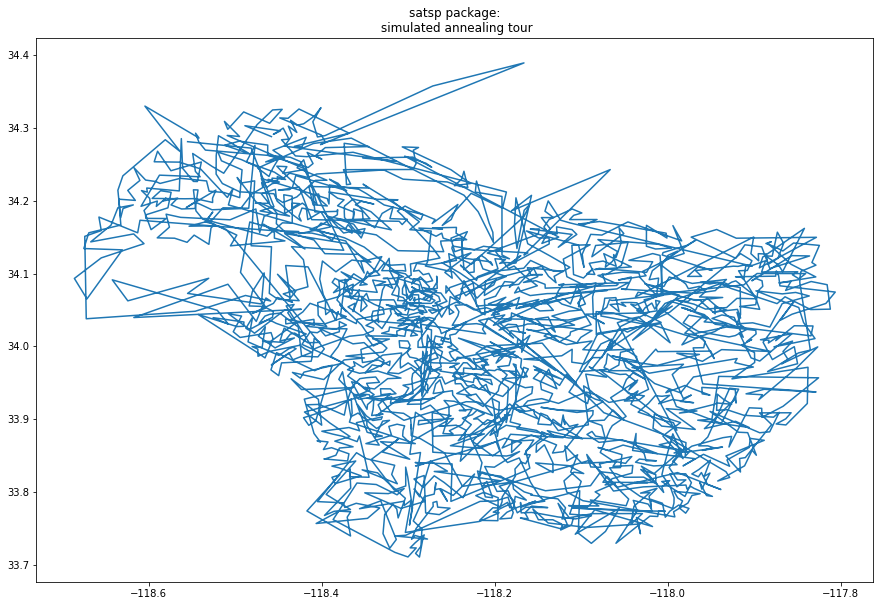

In [84]:
min(satsp_bestTour)
satsp_bestTour_adj = [x-1 for x in satsp_bestTour]

satsp_coor= find_tour_coordinates(satsp_bestTour_adj, locations_df)
plot_coordinates(satsp_coor,"satsp package:\n simulated annealing tour")


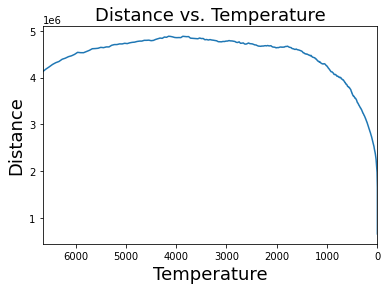

In [22]:
solver.PrintConvergence()

In [ ]:
# solver.PrintBestTour()

In [ ]:
len(satsp_bestTour), min(satsp_bestTour), max(satsp_bestTour)

# Applying elkai
    https://github.com/filipArena/elkai 
    based on LKH: http://akira.ruc.dk/~keld/research/LKH/

In [9]:
!pip3 install elkai

In [10]:
import elkai

In [11]:
%%time
best_elkai_tour = elkai.solve_float_matrix(dist_matrix_final, runs=10) 

CPU times: user 23min 18s, sys: 2.68 s, total: 23min 20s
Wall time: 23min 19s


In [87]:
len(best_elkai_tour), min(best_elkai_tour), max(best_elkai_tour)

(2649, 0, 2648)

In [95]:
#find best distance:
print(best_elkai_tour[:4])
#we need to find the distance between these two cities
dist_matrix_final[0][758], dist_matrix_final[758][32]

[0, 758, 32, 2306]


(92.03, 108.39)

In [105]:
edge_dist=[]
length = len(best_elkai_tour)
for i in range(length-1):
    loc1 = best_elkai_tour[i]
    loc2 = best_elkai_tour[i+1]
    edge_dist.append (dist_matrix_final[loc1][loc2])    
#     print(dist_matrix_final[best_elkai_tour[i]][best_elkai_tour[i+1]])

#add last edge from stop of tour to start
# edge_dist.append(dist_matrix_final[best_elkai_tour[0]][best_elkai_tour[length]])

In [113]:
# edge_dist

In [107]:
sum(edge_dist) 

310557.9599999995

In [115]:
dist_returnEdge = dist_matrix_final[best_elkai_tour[0]][best_elkai_tour[length-1]]

In [118]:
elkai_bestDistance = sum(edge_dist) + dist_returnEdge
elkai_bestDistance

310627.7599999995

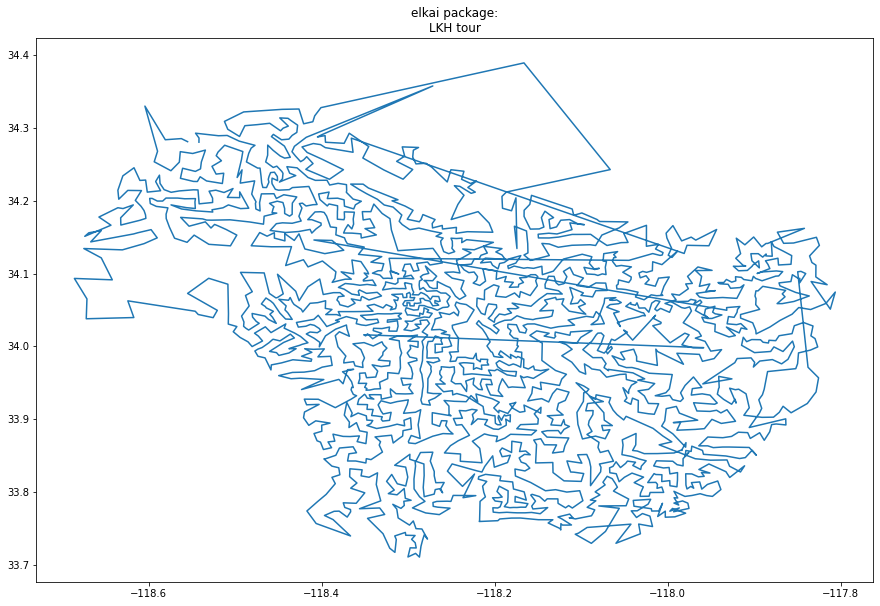

In [88]:
elkai_coor= find_tour_coordinates(best_elkai_tour, locations_df)
plot_coordinates(elkai_coor,"elkai package:\nLKH tour")


# Check Tours

In [ ]:
def check_match(str1, str2):
    res_str = str1_str1
    return str2 in res_str

def add_index(tour_arr):
    return [x+1 for x in tour_arr]


In [ ]:
temp3 = [item for item in res if item not in satsp_bestTour]

# Applying tsp
    https://pypi.org/project/tsp/

In [ ]:
!pip3 install tsp

In [ ]:
import tsp

In [ ]:
mat = adj.data
r = range(len(mat))

In [ ]:
dis = {(i, j): mat[i][j] for i in r for j in r}

In [ ]:
# best_tsp_tour = tsp.tsp(r, dis)

# Applying mlrose
https://github.com/gkhayes/mlrose

In [ ]:
!pip3 install mlrose

In [ ]:
# change /usr/local/lib/python3.7/site-packages/mlrose/neural.py", line 12
# to import six

In [ ]:
import mlrose


In [ ]:
# Create list of distances between pairs of cities
dist_list = edge_arr

# Initialize fitness function object using dist_list
fitness_dists = mlrose.TravellingSales(distances = dist_list)
# dist_list

In [ ]:
# Define optimization problem object
problem_fit2 = mlrose.TSPOpt(length = 8, fitness_fn = fitness_dists, maximize = False)

In [ ]:
%%time
# Solve using genetic algorithm
best_state, best_fitness = mlrose.genetic_alg(problem_fit2, mutation_prob = 0.2, max_attempts = 100,random_state = 2)

# Next possible steps:
    - plot tsp graph/trajectory for each one?
    - compare different packages/algorithms (time, empirical performance, etc)
    - look at different city data?